In [1]:
import stata_setup
stata_setup.config(r"/Applications/Stata/", "be")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: 35-user network, expiring 18 May 2026
Serial number: 301809305068
  Licensed to: Brian Locke
               University of Utah

Notes:
      1. Unicode is supported; see help unicode_advice.


In [2]:
%%stata
clear
use "data/full_db"


. clear

. use "data/full_db"

. 


## This is code to assess inter-rater agreement

First, inter-rater agreement of central-vs peripheral is assessed: I would report the Kappa for this. 
Then, for the Qanadli score - limits of agreement are rported: I would report the mean difference (95% UL and LL agreement)

These are pretty good. 

In [3]:
%%stata
kap central_darren central_mark
kappaetc central_darren central_mark, tab benchmark(d) showscale


. kap central_darren central_mark

             Expected
Agreement   agreement     Kappa   Std. err.         Z      Prob>Z
-----------------------------------------------------------------
  85.43%      49.97%     0.7088     0.0813       8.72      0.0000

. kappaetc central_darren central_mark, tab benchmark(d) showscale

Interrater agreement                             Number of subjects =     151
                                                Ratings per subject =       2
                                        Number of rating categories =       2
------------------------------------------------------------------------------
                     |                                       Deterministic
                     |   Coef.  Std. Err.  P in.  P cum.  [Benchmark Interval]
---------------------+--------------------------------------------------------
   Percent Agreement |  0.8543    0.0288   0.97   0.969     0.8000     1.0000
Brennan and Prediger |  0.7086    0.0576   0.91   0


. pvenn2 central_darren central_mark, plabel("Central_DW" "Central_MD") title("
> Agreement in Central Determination")

 Central PE |
       [DW] |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         78       51.66       51.66
          1 |         73       48.34      100.00
------------+-----------------------------------
      Total |        151      100.00

Central PE |    Central PE [MD]
      [DW] |         0          1 |     Total
-----------+----------------------+----------
         0 |        65         13 |        78 
         1 |         9         64 |        73 
-----------+----------------------+----------
     Total |        74         77 |       151 

Sizes of subsets:
Set A: Central_DW as identified by the variable central_darren: 73
Set B: Central_MD as identified by the variable central_mark: 77
Set C: Population_C: 0
AB Overlap: 64
AC Overlap: 0
BC Overlap: 0
ABC Overlap: 0
Total population: 151
Draw total popula

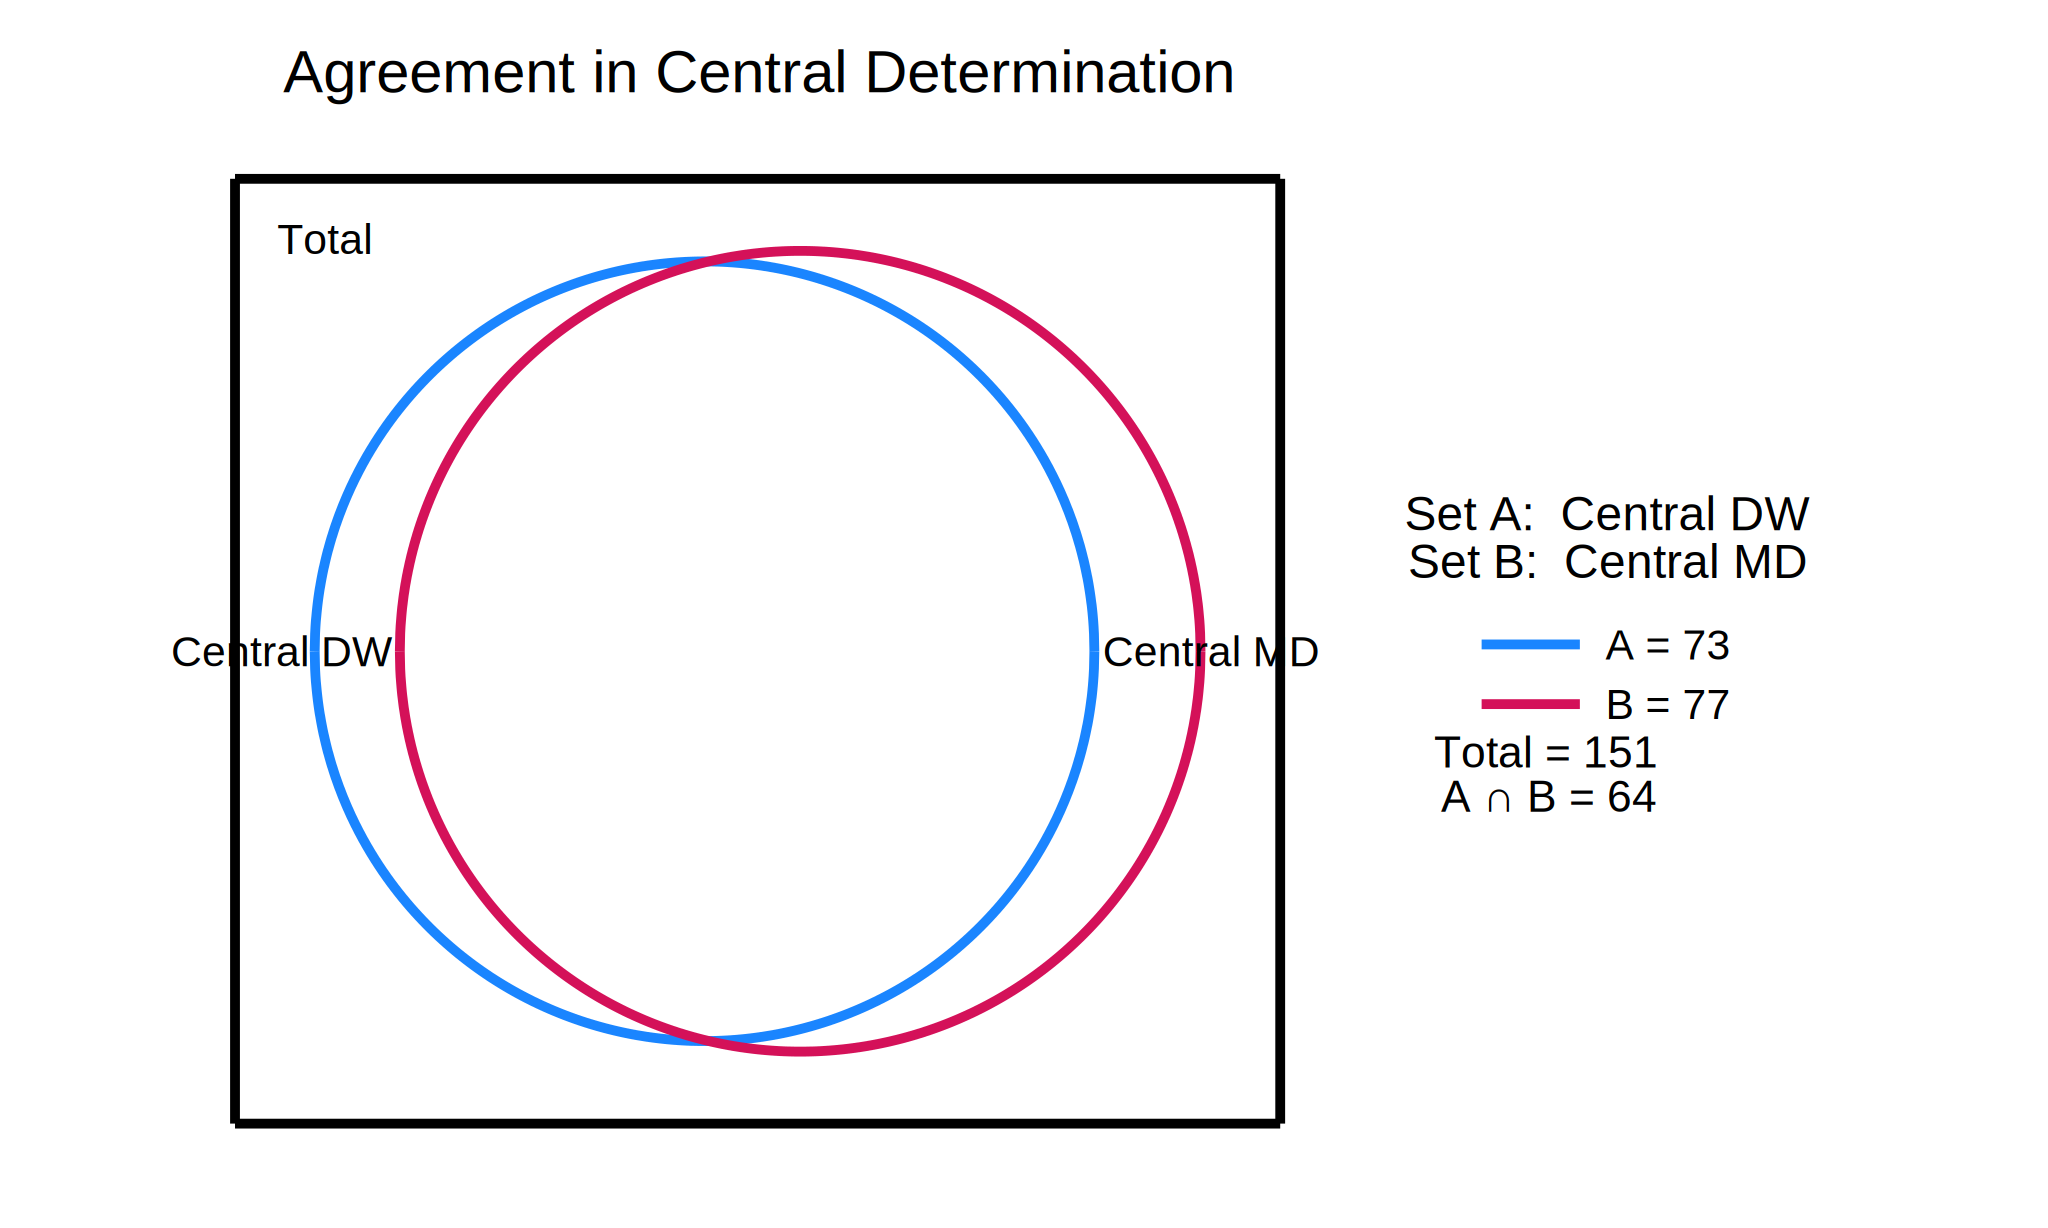

In [4]:
%%stata
pvenn2 central_darren central_mark, plabel("Central_DW" "Central_MD") title("Agreement in Central Determination")
graph export "Results and Figures/$S_DATE/Overlap in Central Assessments.png", as(png) name("Graph") replace 


. kappaetc qanadli_mark qanadli_darren, loa returnonly

. // di "Number of subjects: " r(N)
. di "Mean difference of ratings: " r(mean_diff)
Mean difference of ratings: .00943709

. // di "Standard deviation of mean difference: " r(sd_diff)
. di "Lower limit of agreement: " r(loa_ll)
Lower limit of agreement: -.12273844

. di "Upper limit of agreement: " r(loa_ul)
Upper limit of agreement: .14161261

. di "Level for limits of agreement: " r(loa_level)
Level for limits of agreement: 95

. kappaetc qanadli_mark qanadli_darren, loa 

. graph export "Results and Figures/$S_DATE/Bland Altman Qanadli.png", as(png) 
> name("Graph") replace 
file Results and Figures/ 2 Feb 2025/Bland Altman Qanadli.png written in PNG fo
> rmat

. 


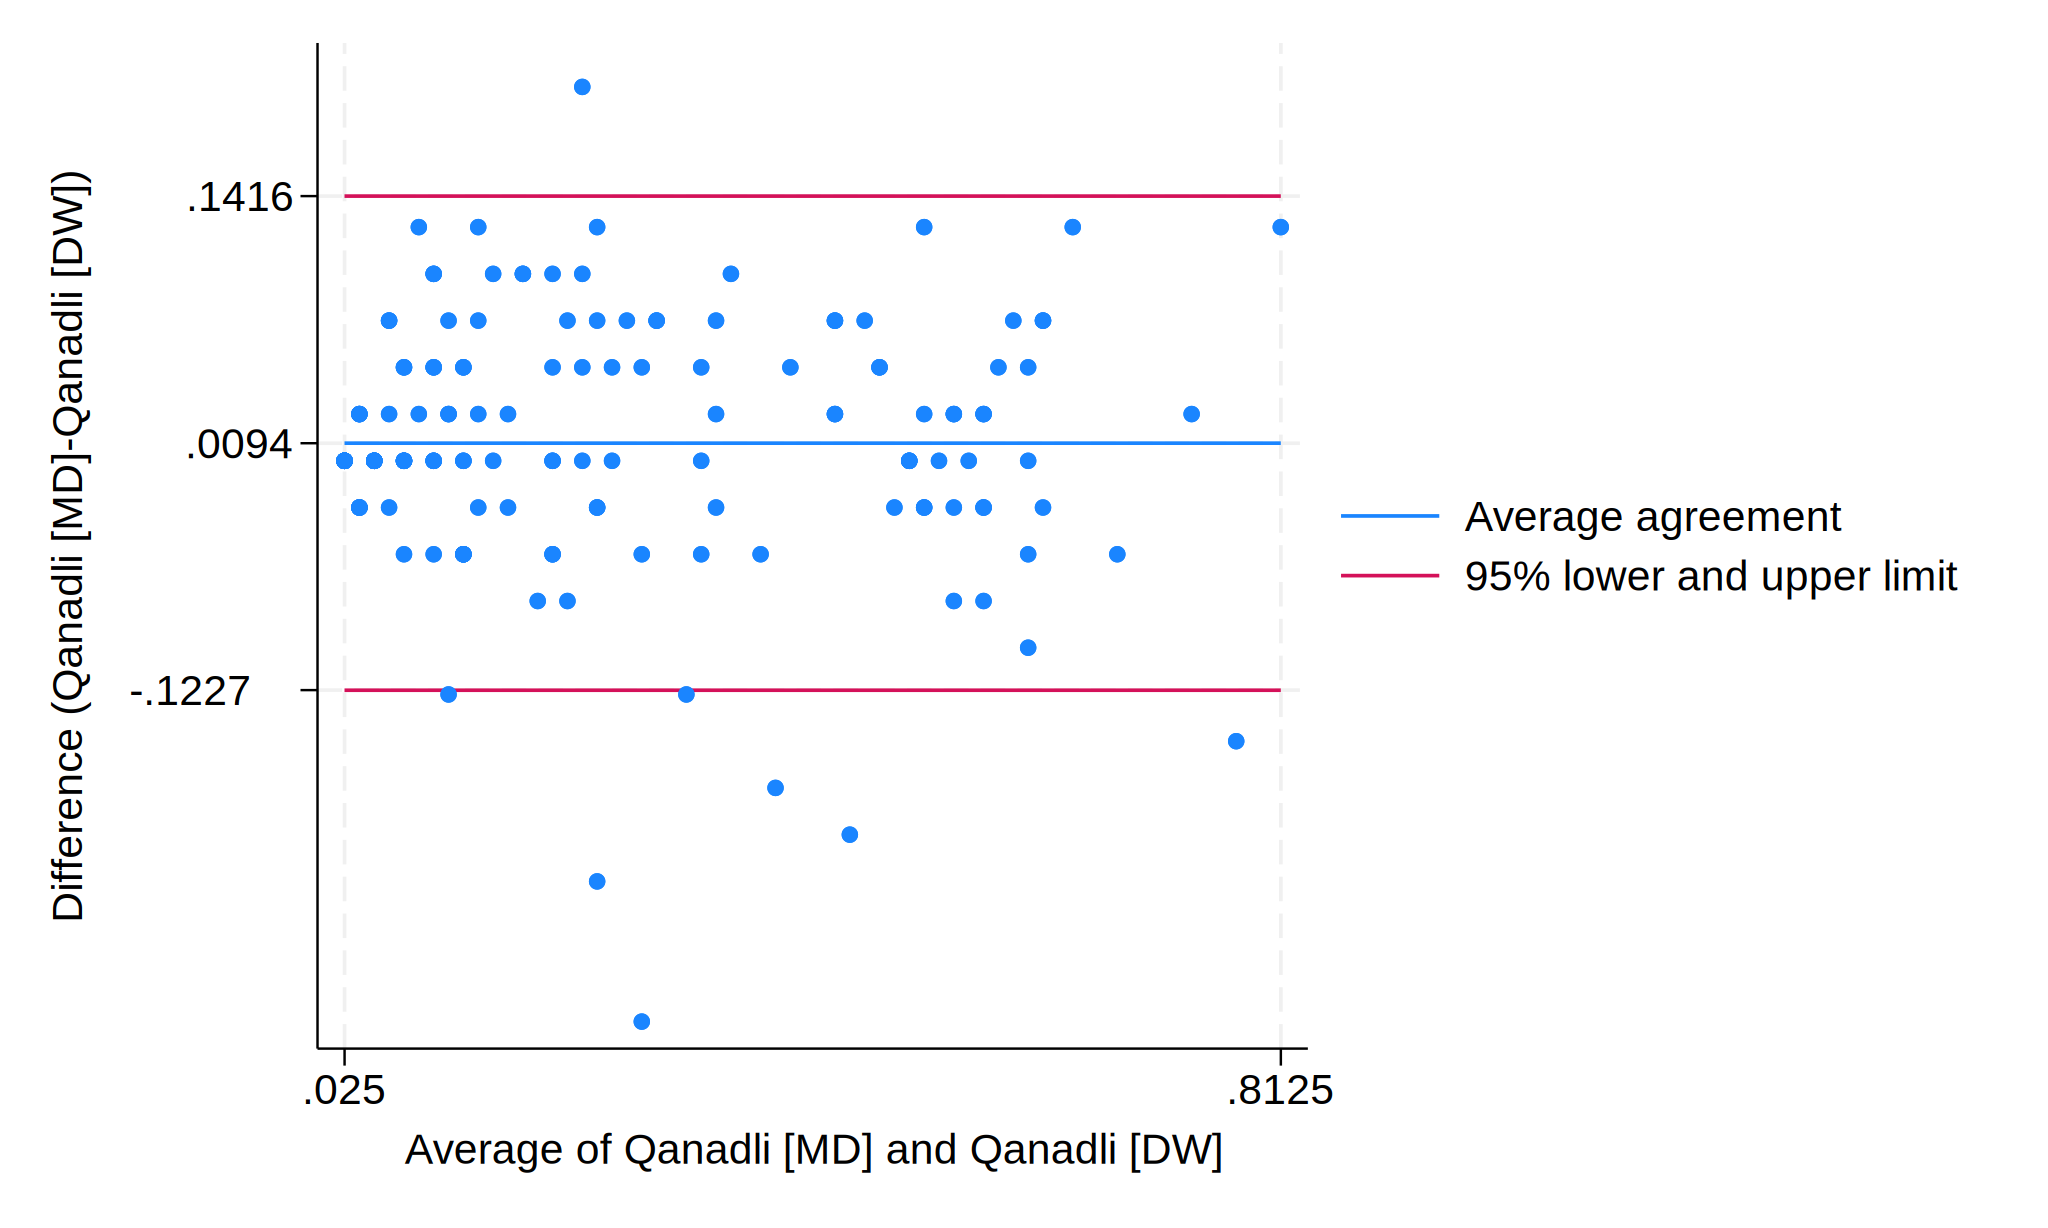

In [5]:
%%stata
kappaetc qanadli_mark qanadli_darren, loa returnonly
// di "Number of subjects: " r(N)
di "Mean difference of ratings: " r(mean_diff)
// di "Standard deviation of mean difference: " r(sd_diff)
di "Lower limit of agreement: " r(loa_ll)
di "Upper limit of agreement: " r(loa_ul)
di "Level for limits of agreement: " r(loa_level)
kappaetc qanadli_mark qanadli_darren, loa 
graph export "Results and Figures/$S_DATE/Bland Altman Qanadli.png", as(png) name("Graph") replace 

In [6]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		central_darren bin %4.0f \ ///
		central_mark bin %4.0f \ ///
		qanadli_darren conts %4.2f \ ///
		qanadli_mark conts %4.2f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ratings mark darren by splenectomy.xlsx", replace)


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 central_darren bin %4.0f \ ///
>                 central_mark bin %4.0f \ ///
>                 qanadli_darren conts %4.2f \ ///
>                 qanadli_mark conts %4.2f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ra
> tings mark darren by splenectomy.xlsx", replace)

  +-----------------------------------------------------+
  | factor            N_T   N_0   N_1   m_T   m_0   m_1 |
  |-----------------------------------------------------|
  | Central PE [DW]   151   100    51     0     0     0 |
  |-----------------------------------------------------|
  | Central PE [MD]   151   100    51     0     0     0 |
  |-----------------------------------------------------|
  | Qanadli [DW]      151   100    51     0     0     0 |
  |---------------------------------------


. regress qanadli_mark qanadli_darren

      Source |       SS           df       MS      Number of obs   =       151
-------------+----------------------------------   F(1, 149)       =   1343.44
       Model |  5.94064768         1  5.94064768   Prob > F        =    0.0000
    Residual |  .658872188       149  .004421961   R-squared       =    0.9002
-------------+----------------------------------   Adj R-squared   =    0.8995
       Total |  6.59951987       150  .043996799   Root MSE        =     .0665

------------------------------------------------------------------------------
qanadli_mark | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
qanadli_da~n |   .9410581   .0256748    36.65   0.000     .8903244    .9917919
       _cons |   .0241628   .0083922     2.88   0.005     .0075796     .040746
------------------------------------------------------------------------------

. local rs

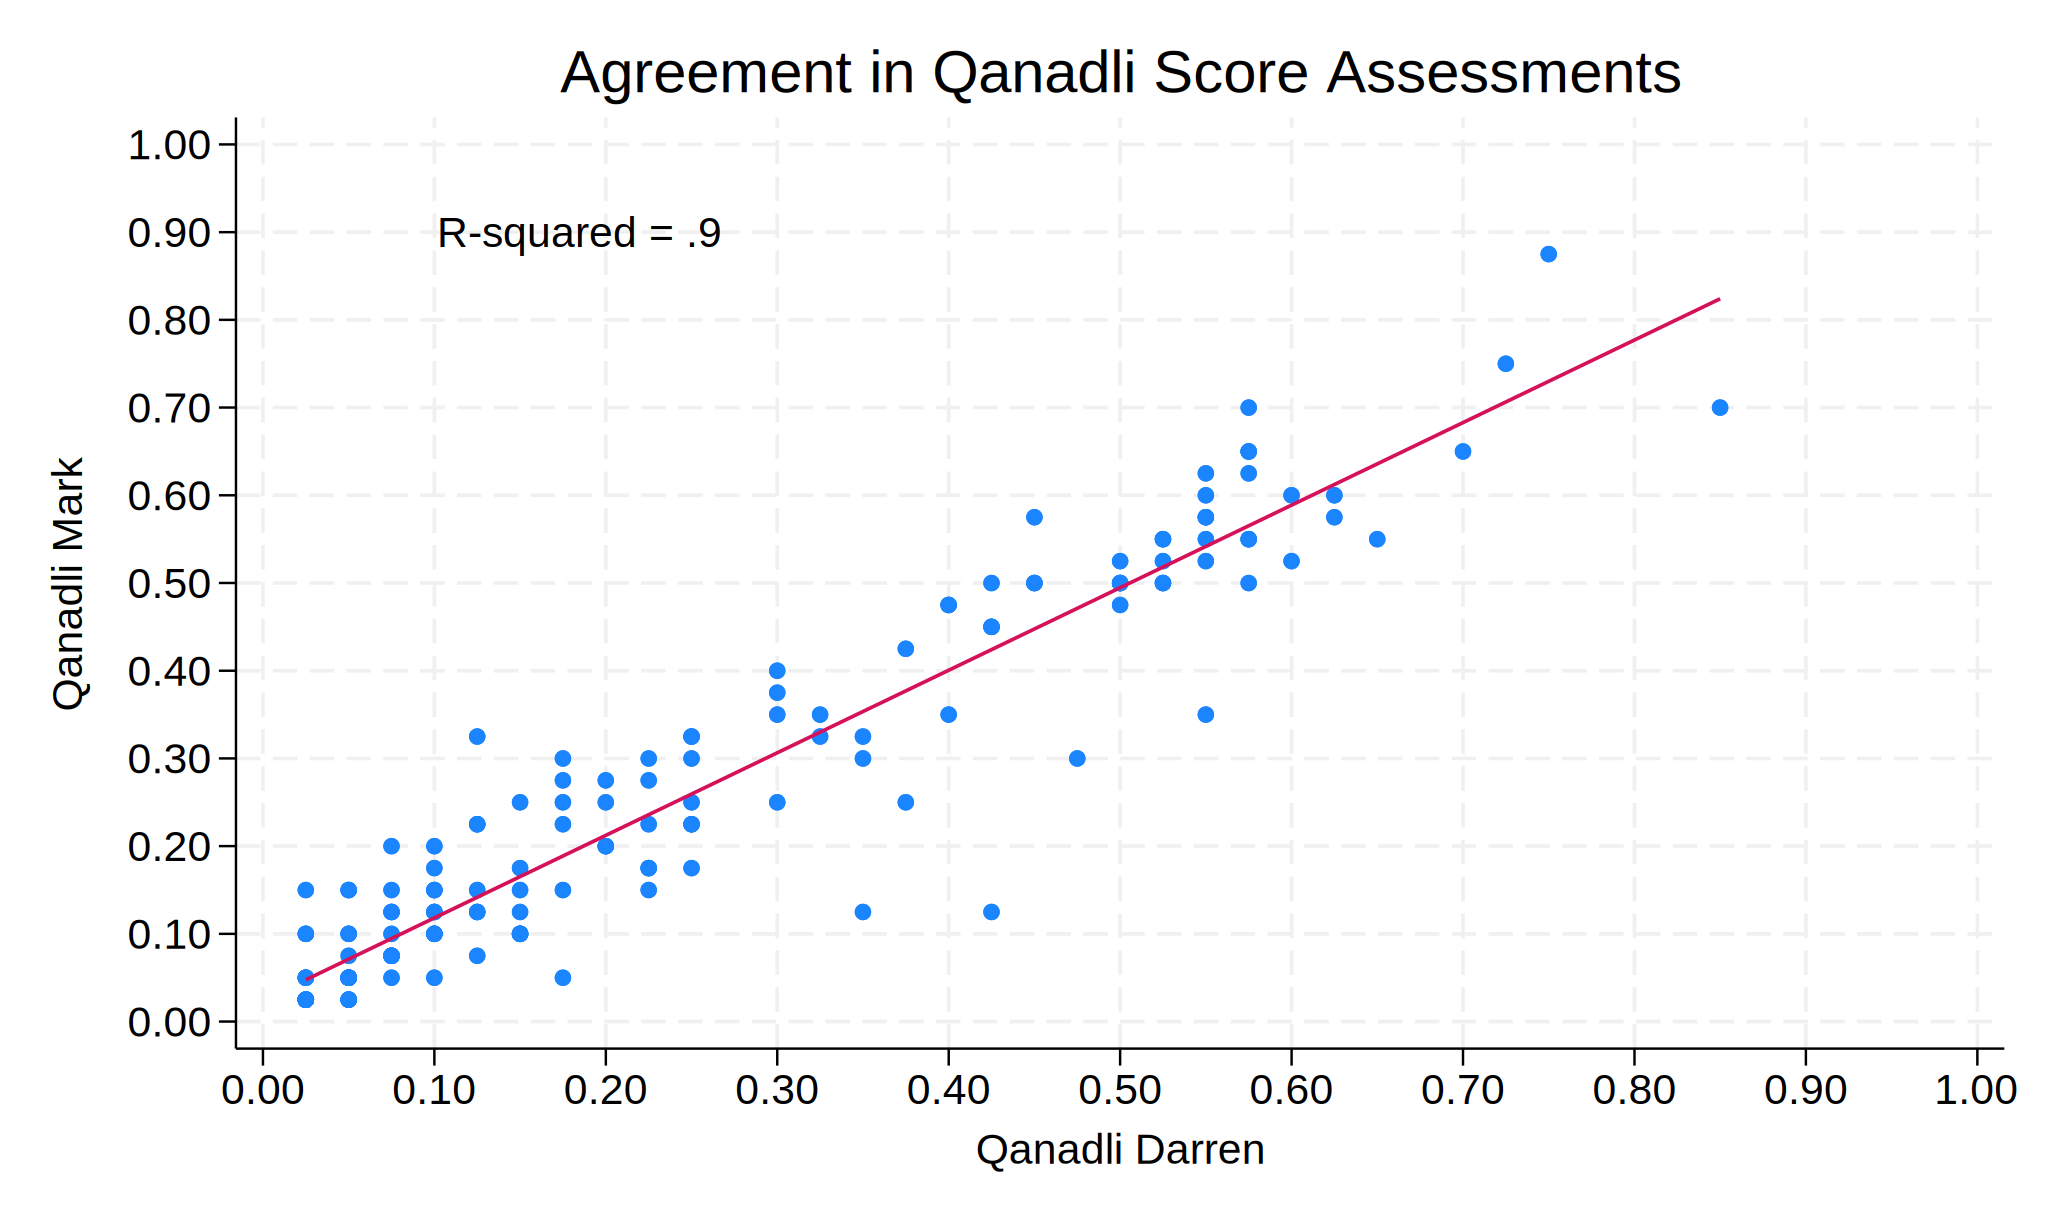

In [7]:
%%stata
regress qanadli_mark qanadli_darren
local rsquared = round(e(r2), 0.01)
twoway (scatter qanadli_mark qanadli_darren) ///
       (lfit qanadli_mark qanadli_darren), ///
       xlabel(0(.1)1, format(%3.2f)) ylabel(0(.1)1, format(%3.2f)) ///
       title("Scatter plot with Regression Line") ///
       xtitle("Qanadli Darren") ytitle("Qanadli Mark") ///
       legend(off) ///
       text(0.9 0.1 "R-squared = `rsquared'", place(e)) ///
	   title("Agreement in Qanadli Score Assessments")
graph export "Results and Figures/$S_DATE/Overlap in Qanadli Assessments.png", as(png) name("Graph") replace

## Summary Tables

stratified by splenectomy status 

- baseline characteristics
- CT and TTE characteristics 
- acute illness characteristics
- outcomes

In [8]:
%%stata

table1_mc, by(splenectomy) ///
		vars( ///
		age contn %4.0f \ ///
		male_sex bin %4.0f \ ///
		raceethnicity cat %4.0f \ ///
		bmi_pe conts %4.1f \ ///
		years_since_splenectomy conts %4.1f \ ///
		pe_date conts %td \ ///
		prior_pe_dvt bin %4.0f \ ///
		prior_other_vte bin %4.0f \ ///
		active_malig bin %4.0f \ ///
		sickle_cell bin %4.0f \ ///
		clotting_disorder bin %4.0f \ ///
		chf bin %4.0f \ ///
		chronic_lung bin %4.0f \ ///
		a_fib bin %4.0f \ ///
		curr_preg bin %4.0f \ ///
		obesity_dx bin %4.0f \ ///
		thyroid_dz bin %4.0f \ ///
		ibd bin %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/baseline chars by splenectomy.xlsx", replace)


. 
. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 age contn %4.0f \ ///
>                 male_sex bin %4.0f \ ///
>                 raceethnicity cat %4.0f \ ///
>                 bmi_pe conts %4.1f \ ///
>                 years_since_splenectomy conts %4.1f \ ///
>                 pe_date conts %td \ ///
>                 prior_pe_dvt bin %4.0f \ ///
>                 prior_other_vte bin %4.0f \ ///
>                 active_malig bin %4.0f \ ///
>                 sickle_cell bin %4.0f \ ///
>                 clotting_disorder bin %4.0f \ ///
>                 chf bin %4.0f \ ///
>                 chronic_lung bin %4.0f \ ///
>                 a_fib bin %4.0f \ ///
>                 curr_preg bin %4.0f \ ///
>                 obesity_dx bin %4.0f \ ///
>                 thyroid_dz bin %4.0f \ ///
>                 ibd bin %4.0f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(

In [9]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		central bin %4.0f \ ///
		qanadli conts %4.2f \ ///
		pa_d conts %4.2f \ ///
		aa_d conts %4.2f \ ///
		pa_aa conts %4.2f \ ///
		pa_enlarged bin %4.0f \ ///
		high_pa_aa bin %4.0f \ ///
		pa_enlarged_by_d_or_ratio bin %4.0f \ ///
		rvlvratio_initial1abnormal bin %4.0f \ ///
		rightheartstrain bin %4.0f \ ///
		lvef conts %4.2f \ ///
		septal_flattening bin %4.0f \ ///
		rvsp conts %4.2f \ ///
		insuff_tr_jet_for_rvsp bin %4.0f \ ///
		pv_accel_time conts %4.2f \ ///
		unmeasured_pv_accel_time bin %4.0f \ ///
		tr_velocity conts %4.2f \ ///
		unmeasured_tr_vel bin %4.0f \ ///
		tapse conts %4.2f \ ///
		unmeasured_tapse bin %4.0f \ ///
		rv_basal_diameter cat %4.0f \ ///
		ra_area conts %4.2f \ ///
		unquantified_ra_area bin %4.0f \ ///
		pericardial_eff cat %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ct and tte chars by splenectomy.xlsx", replace)	


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 central bin %4.0f \ ///
>                 qanadli conts %4.2f \ ///
>                 pa_d conts %4.2f \ ///
>                 aa_d conts %4.2f \ ///
>                 pa_aa conts %4.2f \ ///
>                 pa_enlarged bin %4.0f \ ///
>                 high_pa_aa bin %4.0f \ ///
>                 pa_enlarged_by_d_or_ratio bin %4.0f \ ///
>                 rvlvratio_initial1abnormal bin %4.0f \ ///
>                 rightheartstrain bin %4.0f \ ///
>                 lvef conts %4.2f \ ///
>                 septal_flattening bin %4.0f \ ///
>                 rvsp conts %4.2f \ ///
>                 insuff_tr_jet_for_rvsp bin %4.0f \ ///
>                 pv_accel_time conts %4.2f \ ///
>                 unmeasured_pv_accel_time bin %4.0f \ ///
>                 tr_velocity conts %4.2f \ ///
>                 unmeasured_tr_vel bin %4.0f \ ///
>                 tapse conts %4.2f \ ///
>                 unmea

Note: there's really high rates of pa enlargment. I presume this is from the active PEs. Not explained by age, sex

In [10]:
%%stata
logistic high_pa_aa male age splenectomy, or


Logistic regression                                     Number of obs =    151
                                                        LR chi2(3)    =  40.57
                                                        Prob > chi2   = 0.0000
Log likelihood = -78.745876                             Pseudo R2     = 0.2048

------------------------------------------------------------------------------
  high_pa_aa | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    male_sex |    .412047   .1681665    -2.17   0.030     .1851614    .9169444
         age |   .9276167   .0147835    -4.71   0.000     .8990894    .9570491
 splenectomy |   .1748801   .0786412    -3.88   0.000      .072438    .4221962
       _cons |   505.6343   586.7085     5.37   0.000      52.0178    4914.972
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.


In [11]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		location cat %4.0f \ ///
		active_malig bin %4.0f \ ///
		wells_surg bin %4.0f \ ///
		wells_immobility bin %4.0f \ ///
		recent_cvc bin %4.0f \ ///
		curr_preg bin %4.0f \ ///
		curr_estr bin %4.0f \ ///
		pesi_pe conts %4.0f \ ///
		highest_hr conts %4.2f \ ///
		lowest_sbp conts %4.2f \ ///
		lowest_dbp conts %4.2f \ ///
		lowest_map conts %4.2f \ ///
		max_resp cat %4.0f \ ///
		troponin_max conts %4.2f \ ///
		bnp_max conts %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/phys by splenectomy.xlsx", replace)


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 location cat %4.0f \ ///
>                 active_malig bin %4.0f \ ///
>                 wells_surg bin %4.0f \ ///
>                 wells_immobility bin %4.0f \ ///
>                 recent_cvc bin %4.0f \ ///
>                 curr_preg bin %4.0f \ ///
>                 curr_estr bin %4.0f \ ///
>                 pesi_pe conts %4.0f \ ///
>                 highest_hr conts %4.2f \ ///
>                 lowest_sbp conts %4.2f \ ///
>                 lowest_dbp conts %4.2f \ ///
>                 lowest_map conts %4.2f \ ///
>                 max_resp cat %4.0f \ ///
>                 troponin_max conts %4.2f \ ///
>                 bnp_max conts %4.0f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ph
> ys by splenectomy.xlsx", replace)

  +---------------------------

In [12]:
%%stata
table1_mc, by(splenectomy) ///
		vars( ///
		apl_ab bin %4.0f \ ///
		lupus_ac bin %4.0f \ ///
		factor_viii bin %4.0f \ ///
		non_o_blood bin %4.0f \ ///
		anticoagulated bin %4.0f \ ///
		tpa bin %4.0f \ ///
		ivc_filter bin %4.0f \ ///
		mechanical_tx bin %4.0f \ ///
		no_treatment bin %4.0f \ ///
		admissionlocation cat %4.0f \ ///
		hospitallosdays conts %4.0f \ ///
		iculos conts %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/outcomes by splenectomy.xlsx", replace)


. table1_mc, by(splenectomy) ///
>                 vars( ///
>                 apl_ab bin %4.0f \ ///
>                 lupus_ac bin %4.0f \ ///
>                 factor_viii bin %4.0f \ ///
>                 non_o_blood bin %4.0f \ ///
>                 anticoagulated bin %4.0f \ ///
>                 tpa bin %4.0f \ ///
>                 ivc_filter bin %4.0f \ ///
>                 mechanical_tx bin %4.0f \ ///
>                 no_treatment bin %4.0f \ ///
>                 admissionlocation cat %4.0f \ ///
>                 hospitallosdays conts %4.0f \ ///
>                 iculos conts %4.0f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ou
> tcomes by splenectomy.xlsx", replace)

  +--------------------------------------------------------------------------+
  | factor                                 N_T   N_0   N_1   m_T   m_0   m_1 |
  |--

And the same tables, restricted to only ED encounters

In [13]:
%%stata
		//ed_encounter only
table1_mc if ed_encounter, by(splenectomy) ///
		vars( ///
		age contn %4.0f \ ///
		male_sex bin %4.0f \ ///
		raceethnicity cat %4.0f \ ///
		bmi_pe conts %4.1f \ ///
		years_since_splenectomy conts %4.1f \ ///
		pe_date conts %td \ ///
		prior_pe_dvt bin %4.0f \ ///
		prior_other_vte bin %4.0f \ ///
		active_malig bin %4.0f \ ///
		sickle_cell bin %4.0f \ ///
		clotting_disorder bin %4.0f \ ///
		chf bin %4.0f \ ///
		chronic_lung bin %4.0f \ ///
		a_fib bin %4.0f \ ///
		curr_preg bin %4.0f \ ///
		obesity_dx bin %4.0f \ ///
		thyroid_dz bin %4.0f \ ///
		ibd bin %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED only -baseline chars by splenectomy.xlsx", replace)


.                 //ed_encounter only
. table1_mc if ed_encounter, by(splenectomy) ///
>                 vars( ///
>                 age contn %4.0f \ ///
>                 male_sex bin %4.0f \ ///
>                 raceethnicity cat %4.0f \ ///
>                 bmi_pe conts %4.1f \ ///
>                 years_since_splenectomy conts %4.1f \ ///
>                 pe_date conts %td \ ///
>                 prior_pe_dvt bin %4.0f \ ///
>                 prior_other_vte bin %4.0f \ ///
>                 active_malig bin %4.0f \ ///
>                 sickle_cell bin %4.0f \ ///
>                 clotting_disorder bin %4.0f \ ///
>                 chf bin %4.0f \ ///
>                 chronic_lung bin %4.0f \ ///
>                 a_fib bin %4.0f \ ///
>                 curr_preg bin %4.0f \ ///
>                 obesity_dx bin %4.0f \ ///
>                 thyroid_dz bin %4.0f \ ///
>                 ibd bin %4.0f \ ///
>                 ) ///
>                 total(before) percent_n per

In [14]:
%%stata
table1_mc if ed_encounter, by(splenectomy) ///
		vars( ///
		central bin %4.0f \ ///
		qanadli conts %4.2f \ ///
		pa_d conts %4.2f \ ///
		aa_d conts %4.2f \ ///
		pa_aa conts %4.2f \ ///
		pa_enlarged bin %4.0f \ ///
		high_pa_aa bin %4.0f \ ///
		pa_enlarged_by_d_or_ratio bin %4.0f \ ///
		rvlvratio_initial1abnormal bin %4.0f \ ///
		rightheartstrain bin %4.0f \ ///
		lvef conts %4.2f \ ///
		septal_flattening bin %4.0f \ ///
		rvsp conts %4.2f \ ///
		insuff_tr_jet_for_rvsp bin %4.0f \ ///
		pv_accel_time conts %4.2f \ ///
		unmeasured_pv_accel_time bin %4.0f \ ///
		tr_velocity conts %4.2f \ ///
		unmeasured_tr_vel bin %4.0f \ ///
		tapse conts %4.2f \ ///
		unmeasured_tapse bin %4.0f \ ///
		rv_basal_diameter cat %4.0f \ ///
		ra_area conts %4.2f \ ///
		unquantified_ra_area bin %4.0f \ ///
		pericardial_eff cat %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED only - ct and tte chars by splenectomy.xlsx", replace)	


. table1_mc if ed_encounter, by(splenectomy) ///
>                 vars( ///
>                 central bin %4.0f \ ///
>                 qanadli conts %4.2f \ ///
>                 pa_d conts %4.2f \ ///
>                 aa_d conts %4.2f \ ///
>                 pa_aa conts %4.2f \ ///
>                 pa_enlarged bin %4.0f \ ///
>                 high_pa_aa bin %4.0f \ ///
>                 pa_enlarged_by_d_or_ratio bin %4.0f \ ///
>                 rvlvratio_initial1abnormal bin %4.0f \ ///
>                 rightheartstrain bin %4.0f \ ///
>                 lvef conts %4.2f \ ///
>                 septal_flattening bin %4.0f \ ///
>                 rvsp conts %4.2f \ ///
>                 insuff_tr_jet_for_rvsp bin %4.0f \ ///
>                 pv_accel_time conts %4.2f \ ///
>                 unmeasured_pv_accel_time bin %4.0f \ ///
>                 tr_velocity conts %4.2f \ ///
>                 unmeasured_tr_vel bin %4.0f \ ///
>                 tapse conts %4.2f \ ///
>      

In [15]:
%%stata
table1_mc if ed_encounter, by(splenectomy) ///
		vars( ///
		location cat %4.0f \ ///
		active_malig bin %4.0f \ ///
		wells_surg bin %4.0f \ ///
		wells_immobility bin %4.0f \ ///
		recent_cvc bin %4.0f \ ///
		curr_preg bin %4.0f \ ///
		curr_estr bin %4.0f \ ///
		pesi_pe conts %4.0f \ ///
		highest_hr conts %4.2f \ ///
		lowest_sbp conts %4.2f \ ///
		lowest_dbp conts %4.2f \ ///
		lowest_map conts %4.2f \ ///
		max_resp cat %4.0f \ ///
		troponin_max conts %4.2f \ ///
		bnp_max conts %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED only - phys by splenectomy.xlsx", replace)


. table1_mc if ed_encounter, by(splenectomy) ///
>                 vars( ///
>                 location cat %4.0f \ ///
>                 active_malig bin %4.0f \ ///
>                 wells_surg bin %4.0f \ ///
>                 wells_immobility bin %4.0f \ ///
>                 recent_cvc bin %4.0f \ ///
>                 curr_preg bin %4.0f \ ///
>                 curr_estr bin %4.0f \ ///
>                 pesi_pe conts %4.0f \ ///
>                 highest_hr conts %4.2f \ ///
>                 lowest_sbp conts %4.2f \ ///
>                 lowest_dbp conts %4.2f \ ///
>                 lowest_map conts %4.2f \ ///
>                 max_resp cat %4.0f \ ///
>                 troponin_max conts %4.2f \ ///
>                 bnp_max conts %4.0f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED
>  only - phys by splenectomy.xlsx", replace)

  +-

In [16]:
%%stata
table1_mc if ed_encounter, by(splenectomy) ///
		vars( ///
		apl_ab bin %4.0f \ ///
		lupus_ac bin %4.0f \ ///
		factor_viii bin %4.0f \ ///
		non_o_blood bin %4.0f \ ///
		anticoagulated bin %4.0f \ ///
		tpa bin %4.0f \ ///
		ivc_filter bin %4.0f \ ///
		mechanical_tx bin %4.0f \ ///
		no_treatment bin %4.0f \ ///
		admissionlocation cat %4.0f \ ///
		hospitallosdays conts %4.0f \ ///
		iculos conts %4.0f \ ///
		) ///
		total(before) percent_n percsign("%") iqrmiddle(",") sdleft(" (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED Only - outcomes by splenectomy.xlsx", replace)		


. table1_mc if ed_encounter, by(splenectomy) ///
>                 vars( ///
>                 apl_ab bin %4.0f \ ///
>                 lupus_ac bin %4.0f \ ///
>                 factor_viii bin %4.0f \ ///
>                 non_o_blood bin %4.0f \ ///
>                 anticoagulated bin %4.0f \ ///
>                 tpa bin %4.0f \ ///
>                 ivc_filter bin %4.0f \ ///
>                 mechanical_tx bin %4.0f \ ///
>                 no_treatment bin %4.0f \ ///
>                 admissionlocation cat %4.0f \ ///
>                 hospitallosdays conts %4.0f \ ///
>                 iculos conts %4.0f \ ///
>                 ) ///
>                 total(before) percent_n percsign("%") iqrmiddle(",") sdleft("
>  (±") sdright(")") missing onecol test saving("Results and Figures/$S_DATE/ED
>  Only - outcomes by splenectomy.xlsx", replace)              

  +--------------------------------------------------------------------------+
  | factor                                 N

## Distribution visualization

A few key continuous variables, visualized by splenectomy status.


. //Association between splenectomy and quanadli average
. twoway kdensity qanadli if splenectomy == 0, recast(area) fcolor(navy%05) lco
> lor(navy) lpattern(solid) lwidth(*2.5) bwidth(0.1) range(0 1) || ///
> kdensity qanadli if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cr
> anberry) lpattern(solid)  lwidth(*2.5) bwidth(0.1) range(0 1) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(0.1)1, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("Qanadli Score", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Qanadli Score by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/Qanadli by Splenectomy Status.png",
>  as(png) name("Graph") replace 
file Results and Figures/ 2 Feb 2025/Qanadli by Splenectomy Status.png written 
> in PNG format

. 


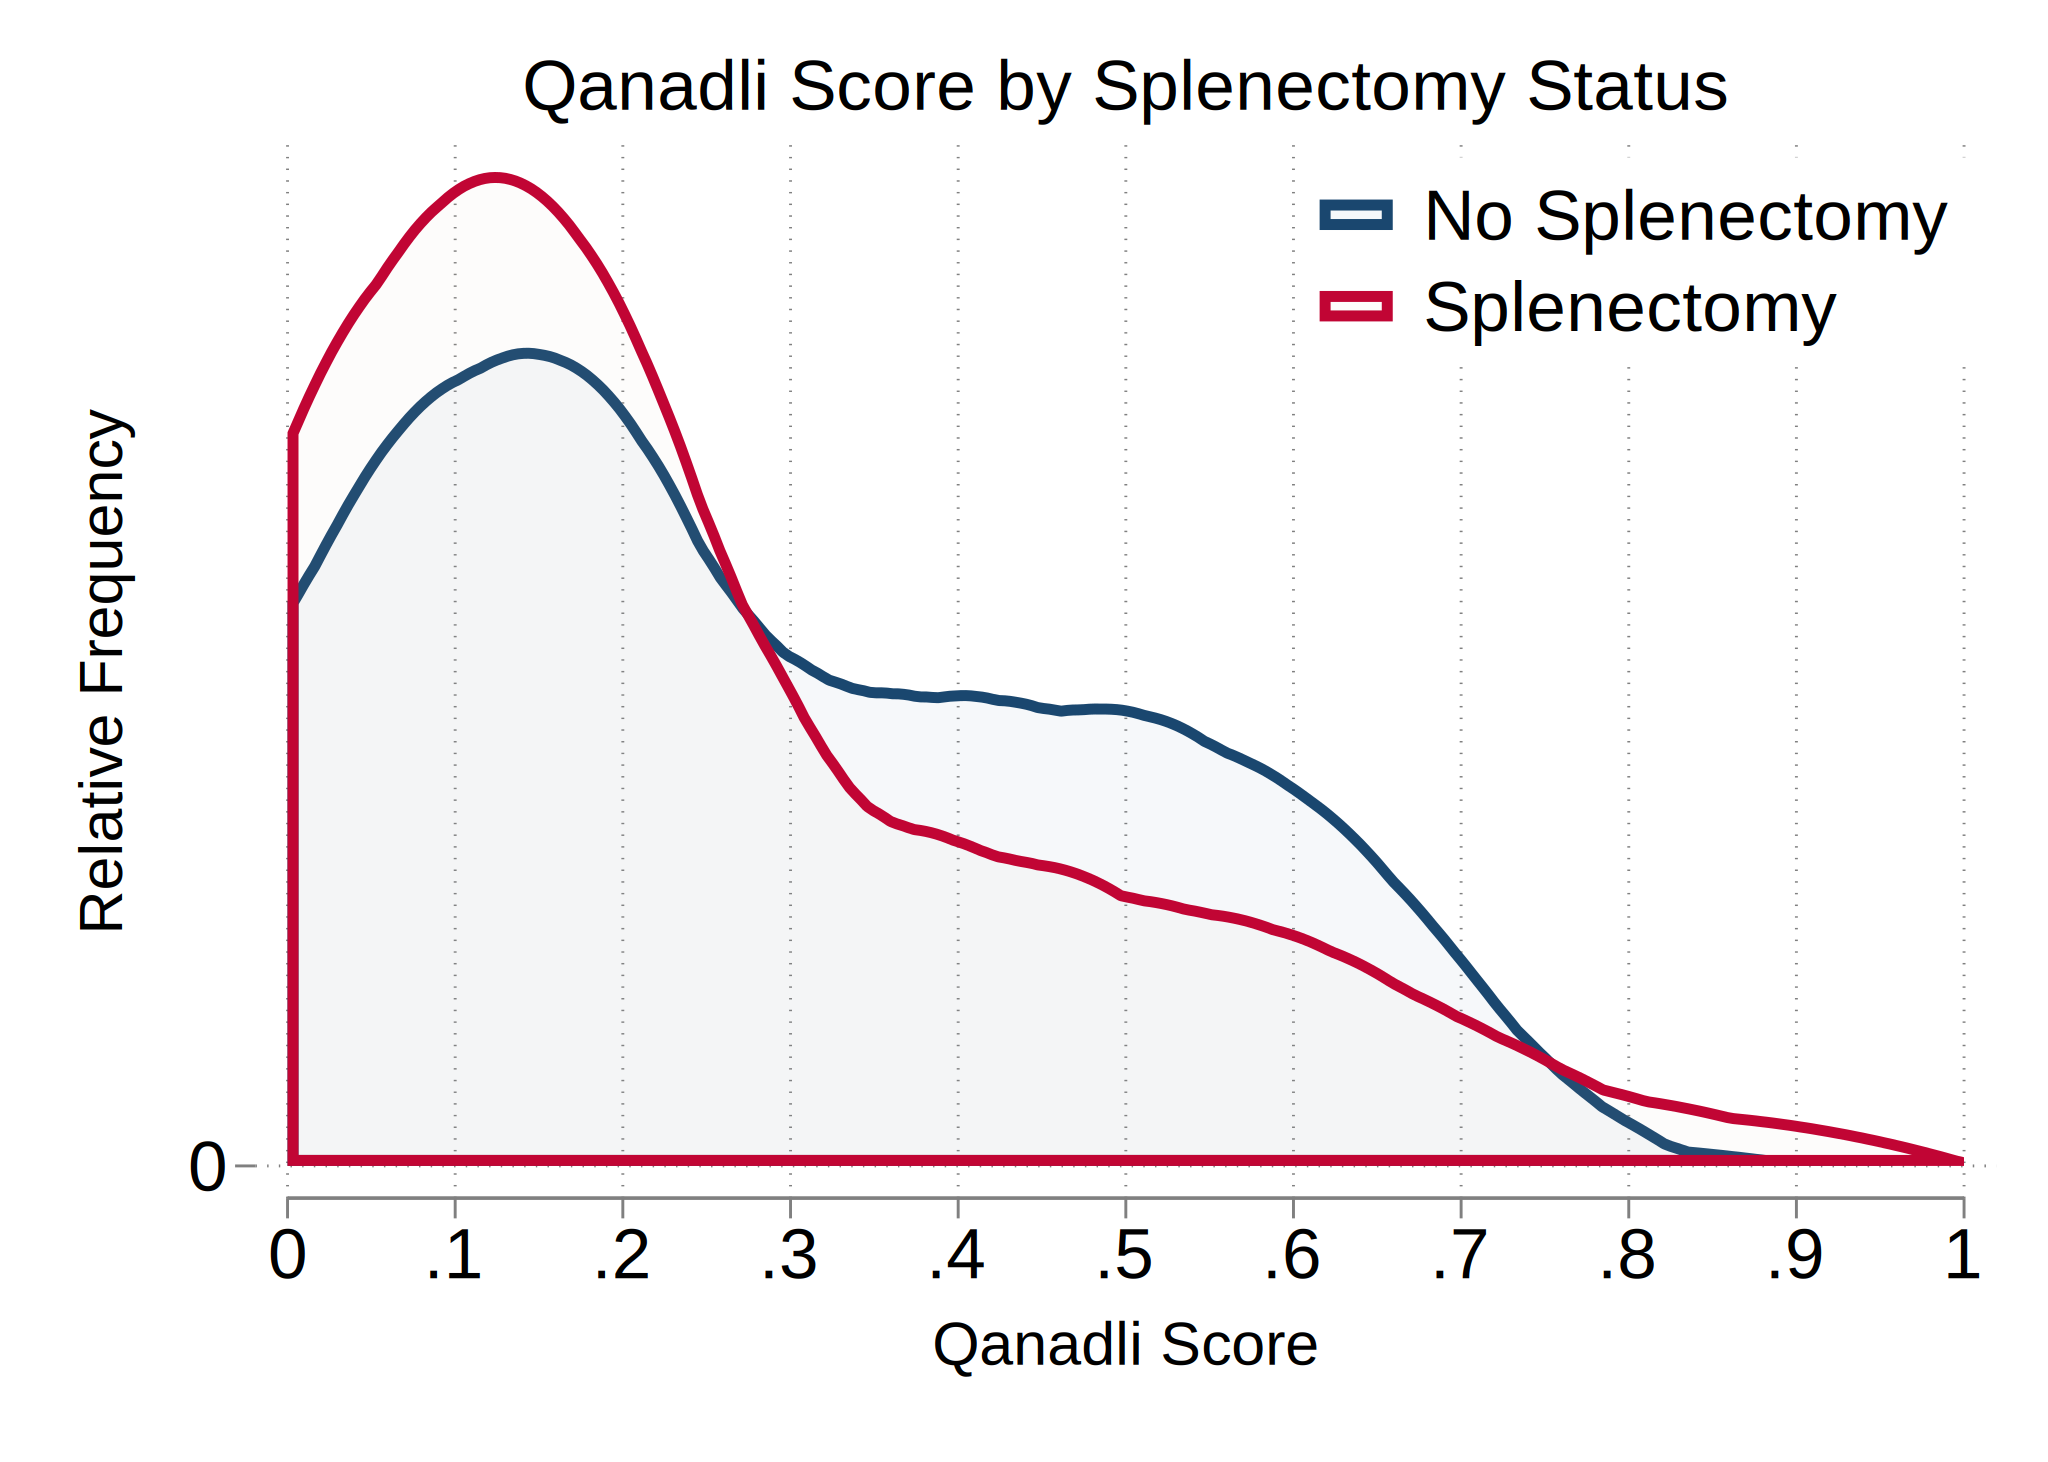

In [17]:
%%stata
//Association between splenectomy and quanadli average
twoway kdensity qanadli if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(0.1) range(0 1) || ///
kdensity qanadli if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(0.1) range(0 1) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(0.1)1, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("Qanadli Score", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Qanadli Score by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/Qanadli by Splenectomy Status.png", as(png) name("Graph") replace 


. // pesi_pe "PESI"
. twoway kdensity pesi_pe if splenectomy == 0, recast(area) fcolor(navy%05) lco
> lor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240) || ///
> kdensity pesi_pe if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cr
> anberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(40)240, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PESI", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("PESI Score by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PESI by Splenectomy Status.png", as
> (png) name("Graph") replace 
file Results and Figures/ 2 Feb 2025/PESI by Splenectomy Status.png written in 
> PNG format

. 


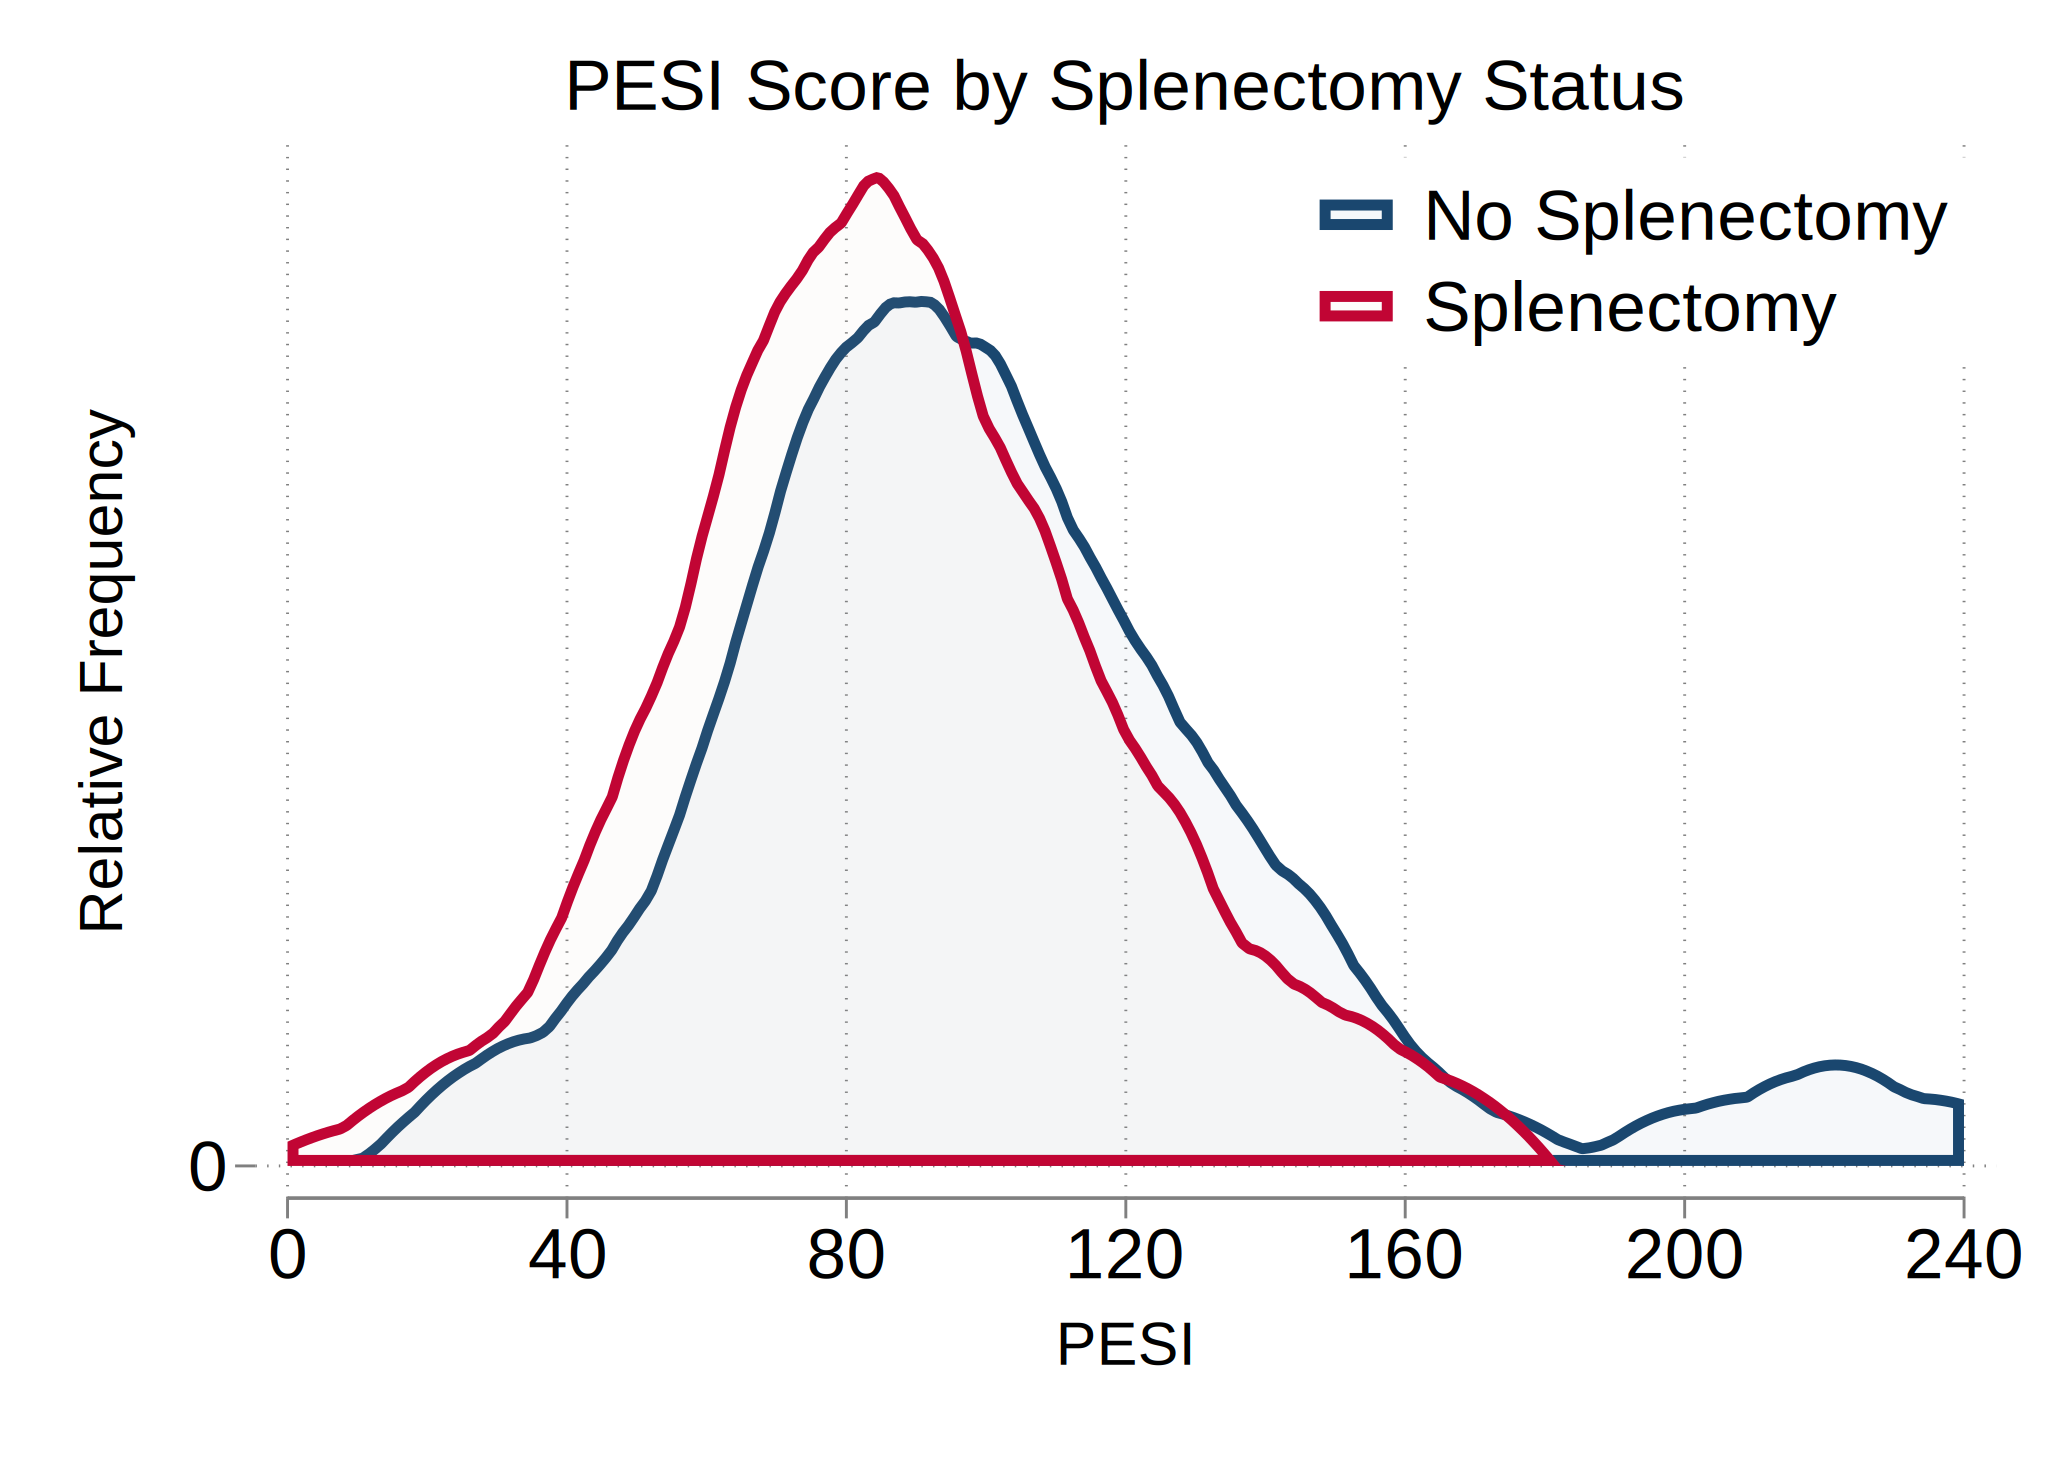

In [18]:
%%stata
// pesi_pe "PESI"
twoway kdensity pesi_pe if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240) || ///
kdensity pesi_pe if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(40)240, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PESI", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("PESI Score by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PESI by Splenectomy Status.png", as(png) name("Graph") replace 


. //and only ED 
. twoway kdensity pesi_pe if splenectomy == 0 & ed_encounter, recast(area) fcol
> or(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240)
>  || ///
> kdensity pesi_pe if splenectomy == 1 & ed_encounter, recast(area) fcolor(eros
> e%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240)
>  ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(40)240, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PESI", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("PESI Score by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/ED only - PESI by Splenectomy Statu
> s.png", as(png) name("Graph") replace 
file Results and Figures/ 2 Feb 2025/ED only - PESI by Splenectomy Status.png w
> ritten in PNG format

. 


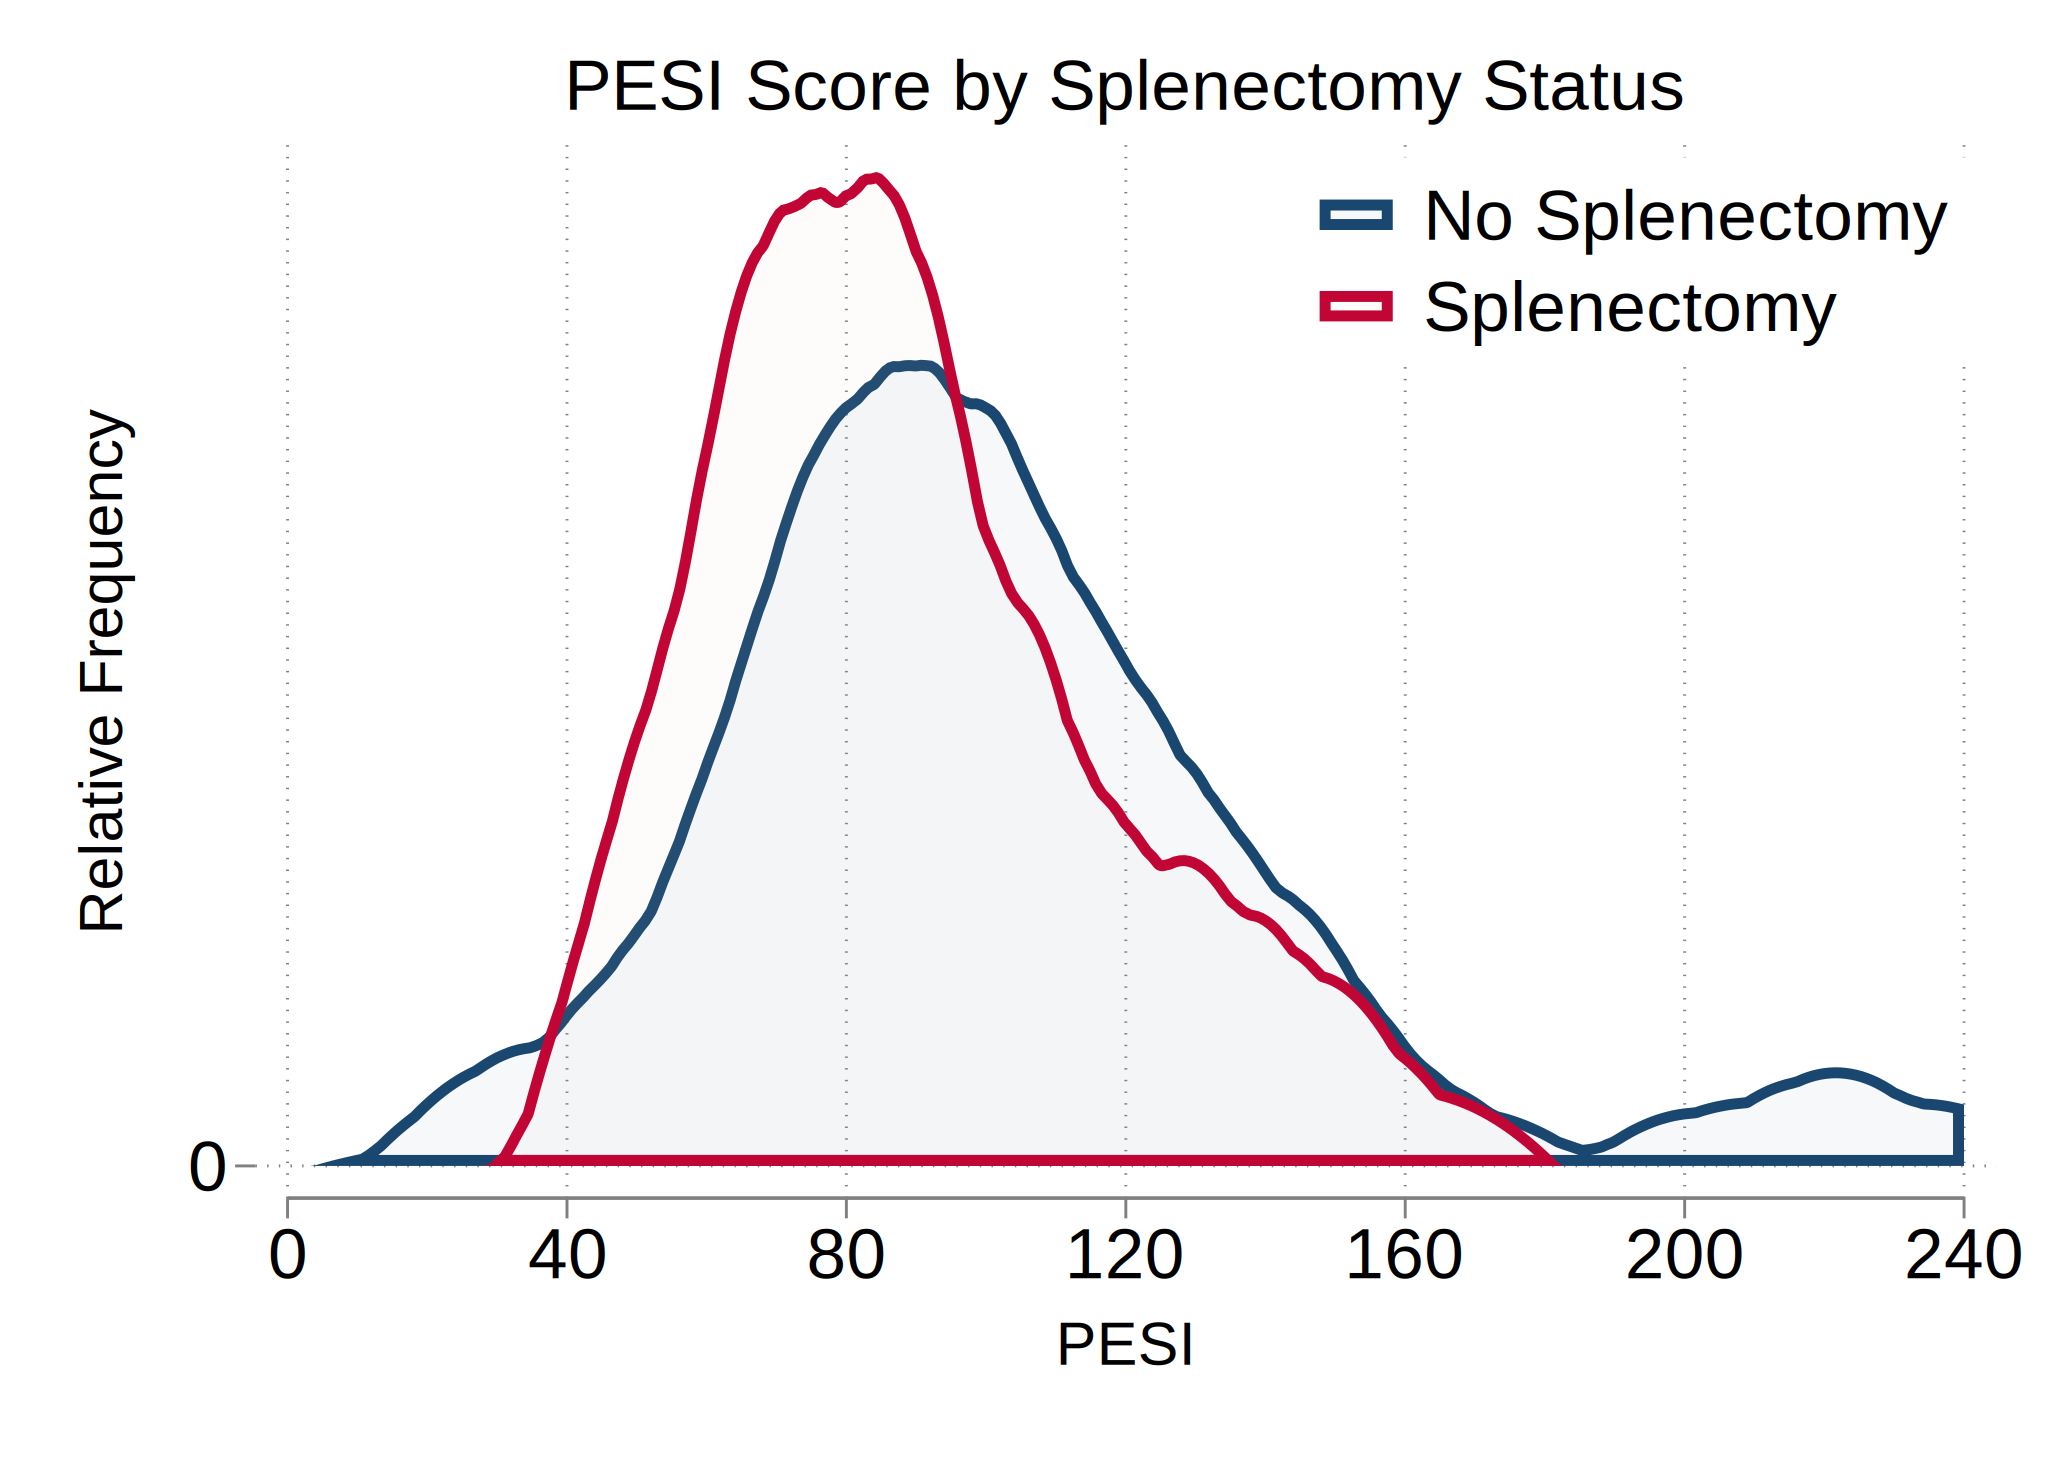

In [19]:
%%stata
//and only ED 
twoway kdensity pesi_pe if splenectomy == 0 & ed_encounter, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(10) range(0 240) || ///
kdensity pesi_pe if splenectomy == 1 & ed_encounter, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(10) range(0 240) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(40)240, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PESI", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("PESI Score by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/ED only - PESI by Splenectomy Status.png", as(png) name("Graph") replace 


. // PA diameter
. twoway kdensity pa_d if splenectomy == 0, recast(area) fcolor(navy%05) lcolor
> (navy) lpattern(solid) lwidth(*2.5) bwidth(2.5) range(10 45) || ///
> kdensity pa_d if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranb
> erry) lpattern(solid)  lwidth(*2.5) bwidth(2.5) range(10 45) ||, ///
> legend(pos(10) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size
> (medlarge)) ///
> xlabel(10(5)45, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PA Diameter (mm)", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("PA Diameter by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PA Diameter by Splenectomy Status.p
> ng", as(png) name("Graph") replace
file Results and Figures/ 2 Feb 2025/PA Diameter by Splenectomy Status.png writ
> ten in PNG format

. 


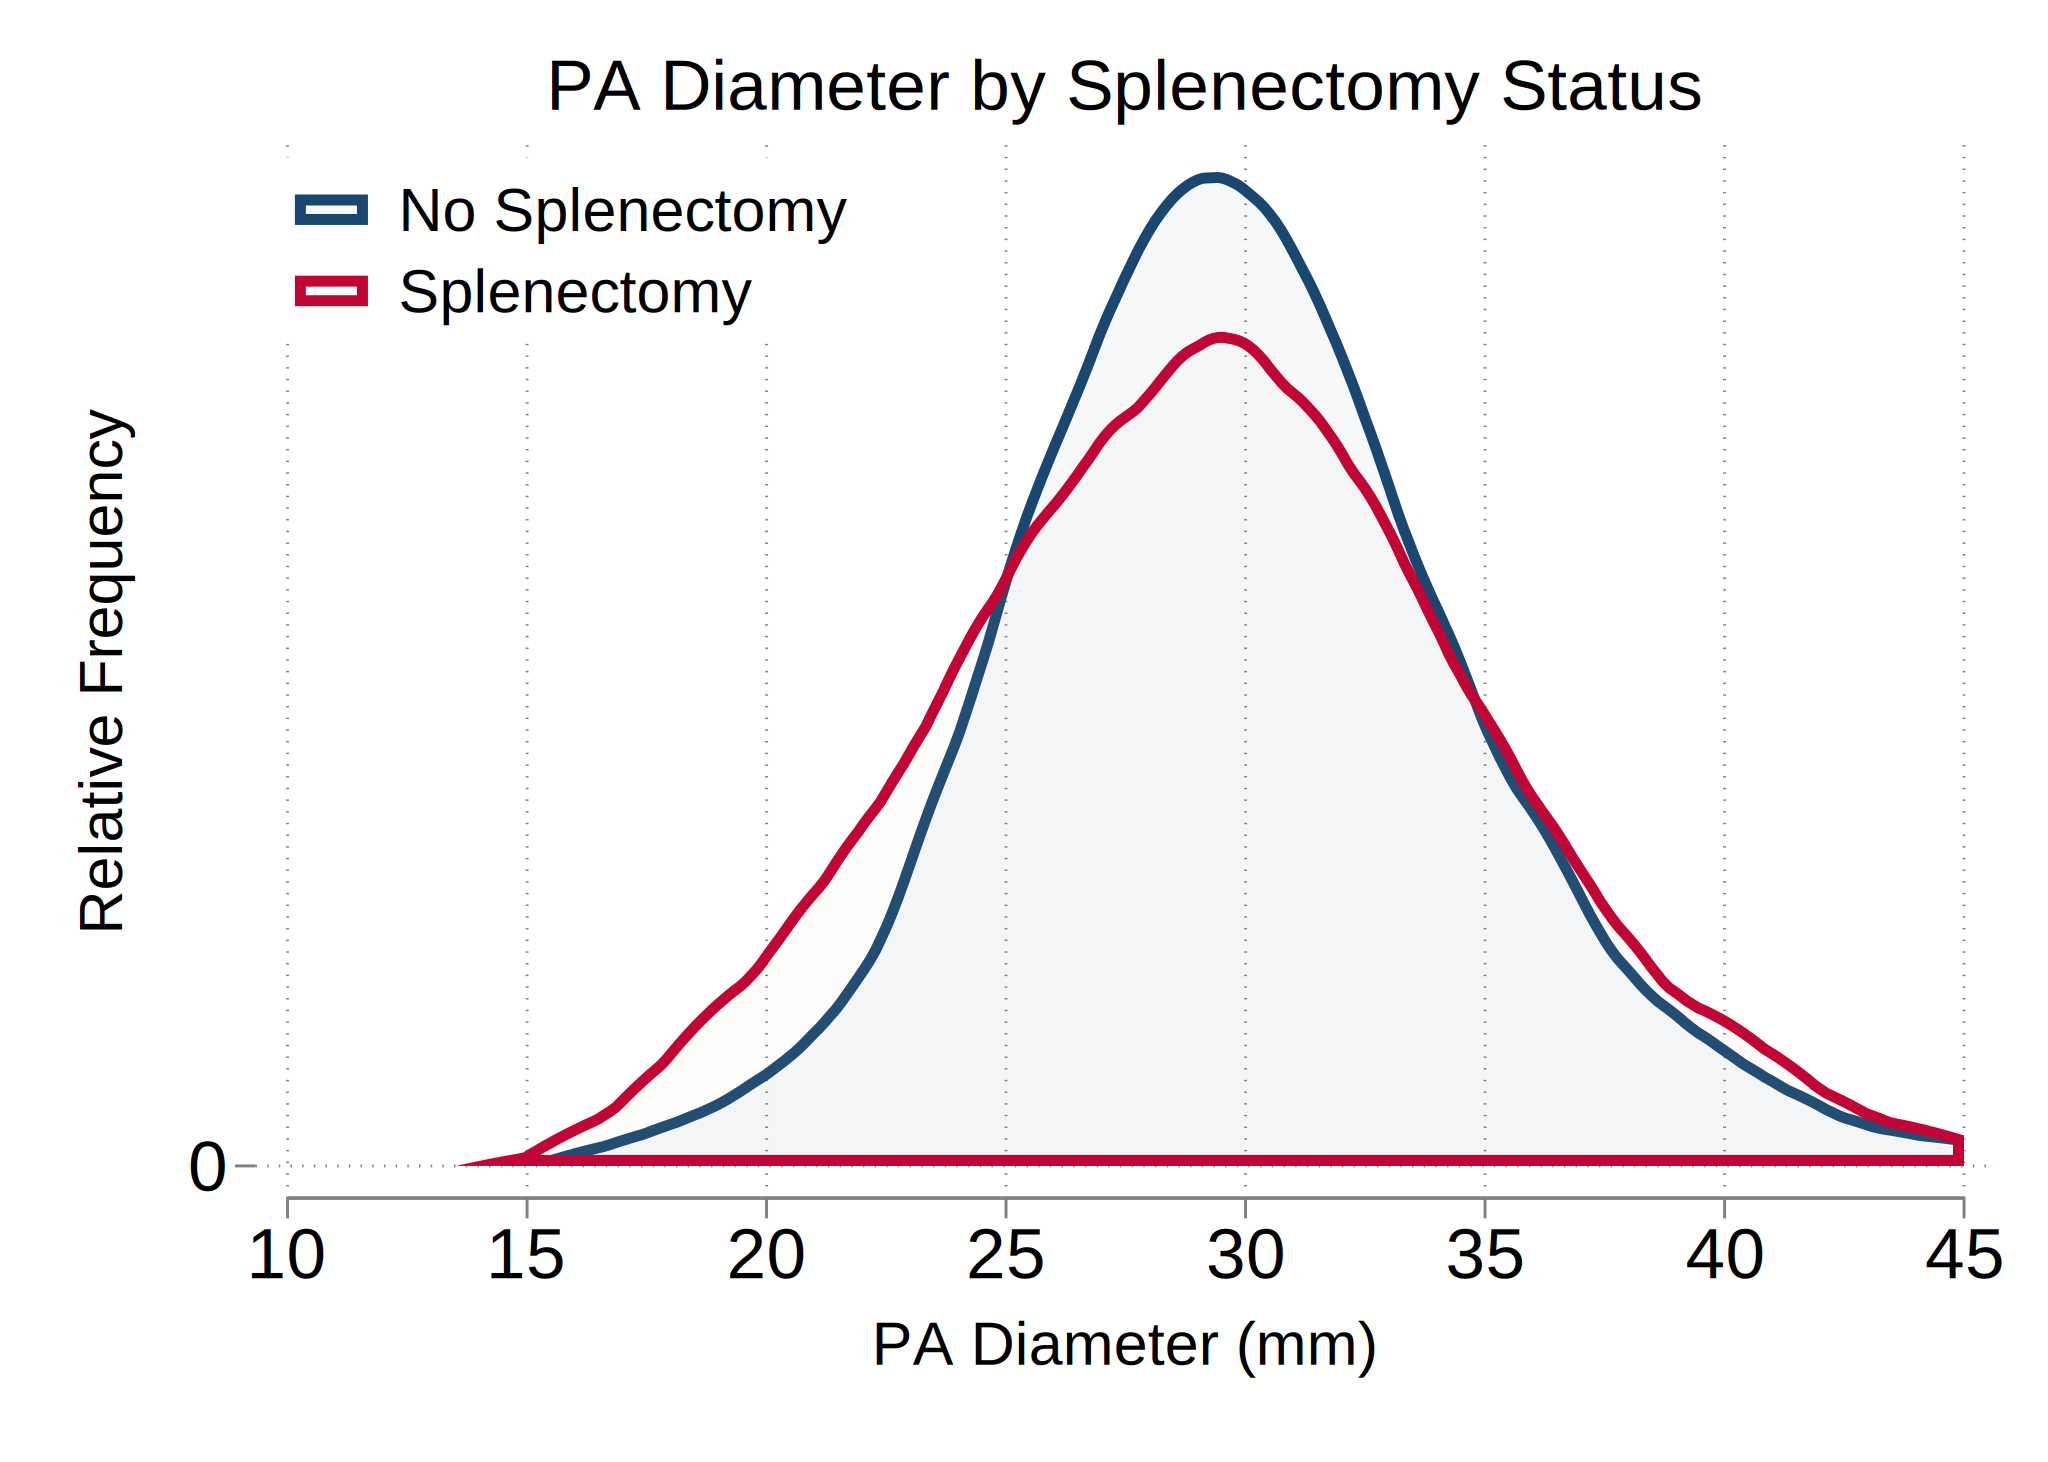

In [20]:
%%stata
// PA diameter
twoway kdensity pa_d if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(2.5) range(10 45) || ///
kdensity pa_d if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(2.5) range(10 45) ||, ///
legend(pos(10) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(medlarge)) ///
xlabel(10(5)45, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PA Diameter (mm)", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("PA Diameter by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PA Diameter by Splenectomy Status.png", as(png) name("Graph") replace


. //PA:AA
. twoway kdensity pa_aa if splenectomy == 0, recast(area) fcolor(navy%05) lcolo
> r(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5) || ///
> kdensity pa_aa if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cran
> berry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0.5(.1)1.5, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PA:AA Ratio", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(lar
> ge)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/PA to AA by Splenectomy Status.png"
> , as(png) name("Graph") replace
file Results and Figures/ 2 Feb 2025/PA to AA by Splenectomy Status.png written
>  in PNG format

. 


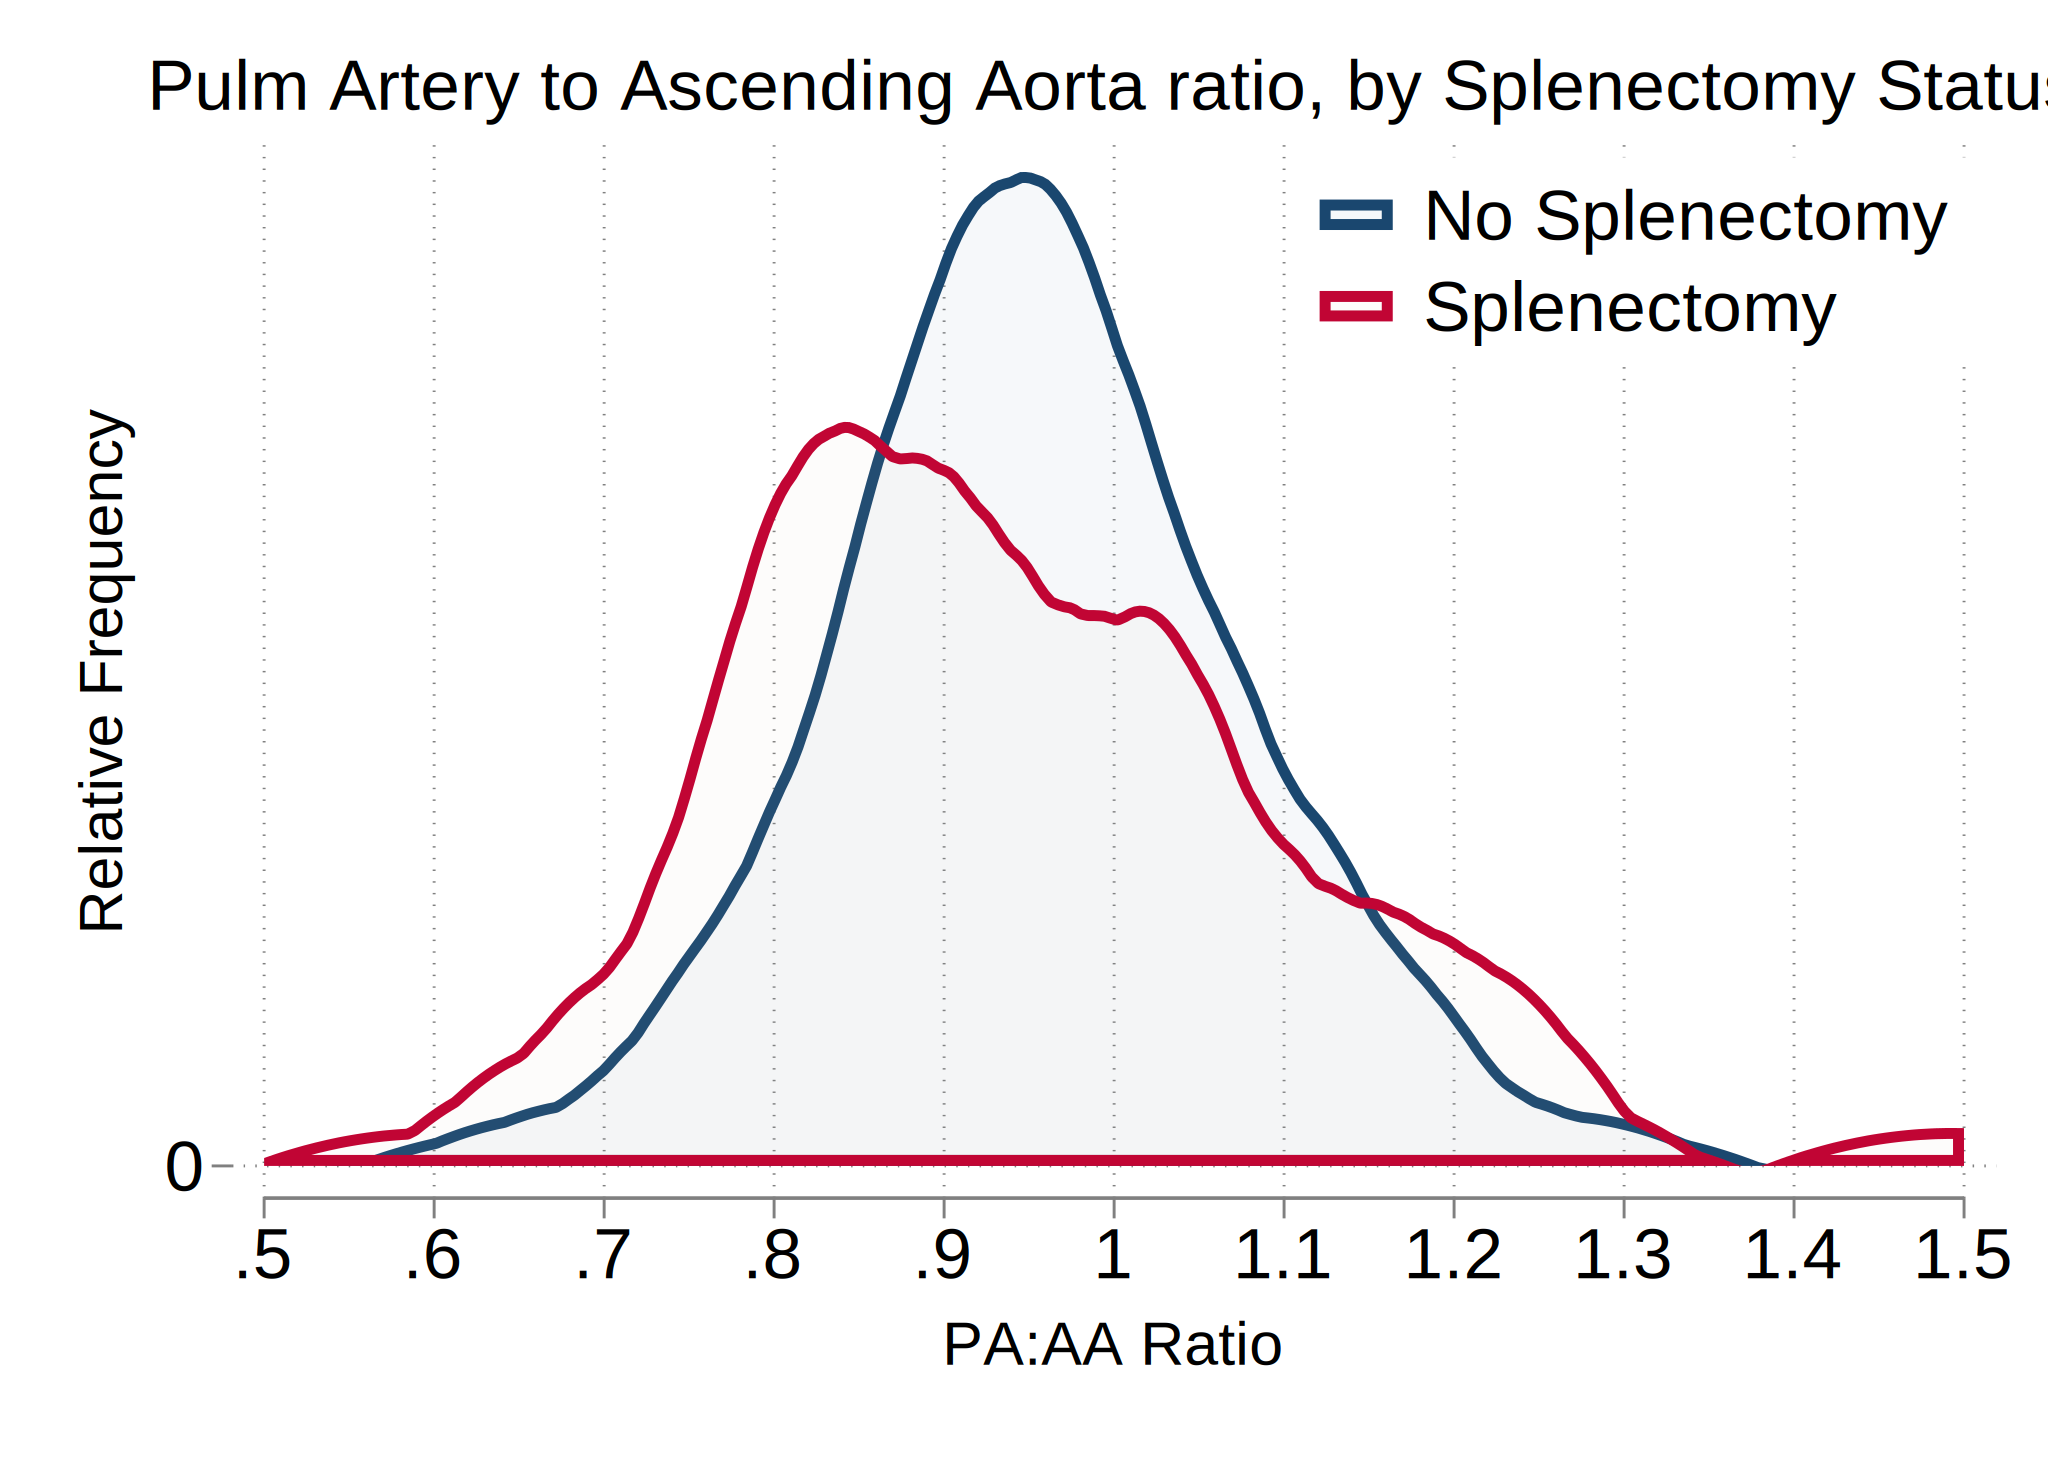

In [21]:
%%stata
//PA:AA
twoway kdensity pa_aa if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5) || ///
kdensity pa_aa if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0.5(.1)1.5, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PA:AA Ratio", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/PA to AA by Splenectomy Status.png", as(png) name("Graph") replace


. //only ed
. twoway kdensity pa_aa if splenectomy == 0 & ed_encounter, recast(area) fcolor
> (navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5
> ) || ///
> kdensity pa_aa if splenectomy == 1 & ed_encounter, recast(area) fcolor(erose%
> 05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5
> ) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0.5(.1)1.5, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("PA:AA Ratio", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(lar
> ge)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/ED-only PA to AA by Splenectomy Sta
> tus.png", as(png) name("Graph") replace
file Results and Figures/ 2 Feb 2025/ED-only PA to AA by Splenectomy Status.png
>  written in PNG format

. 


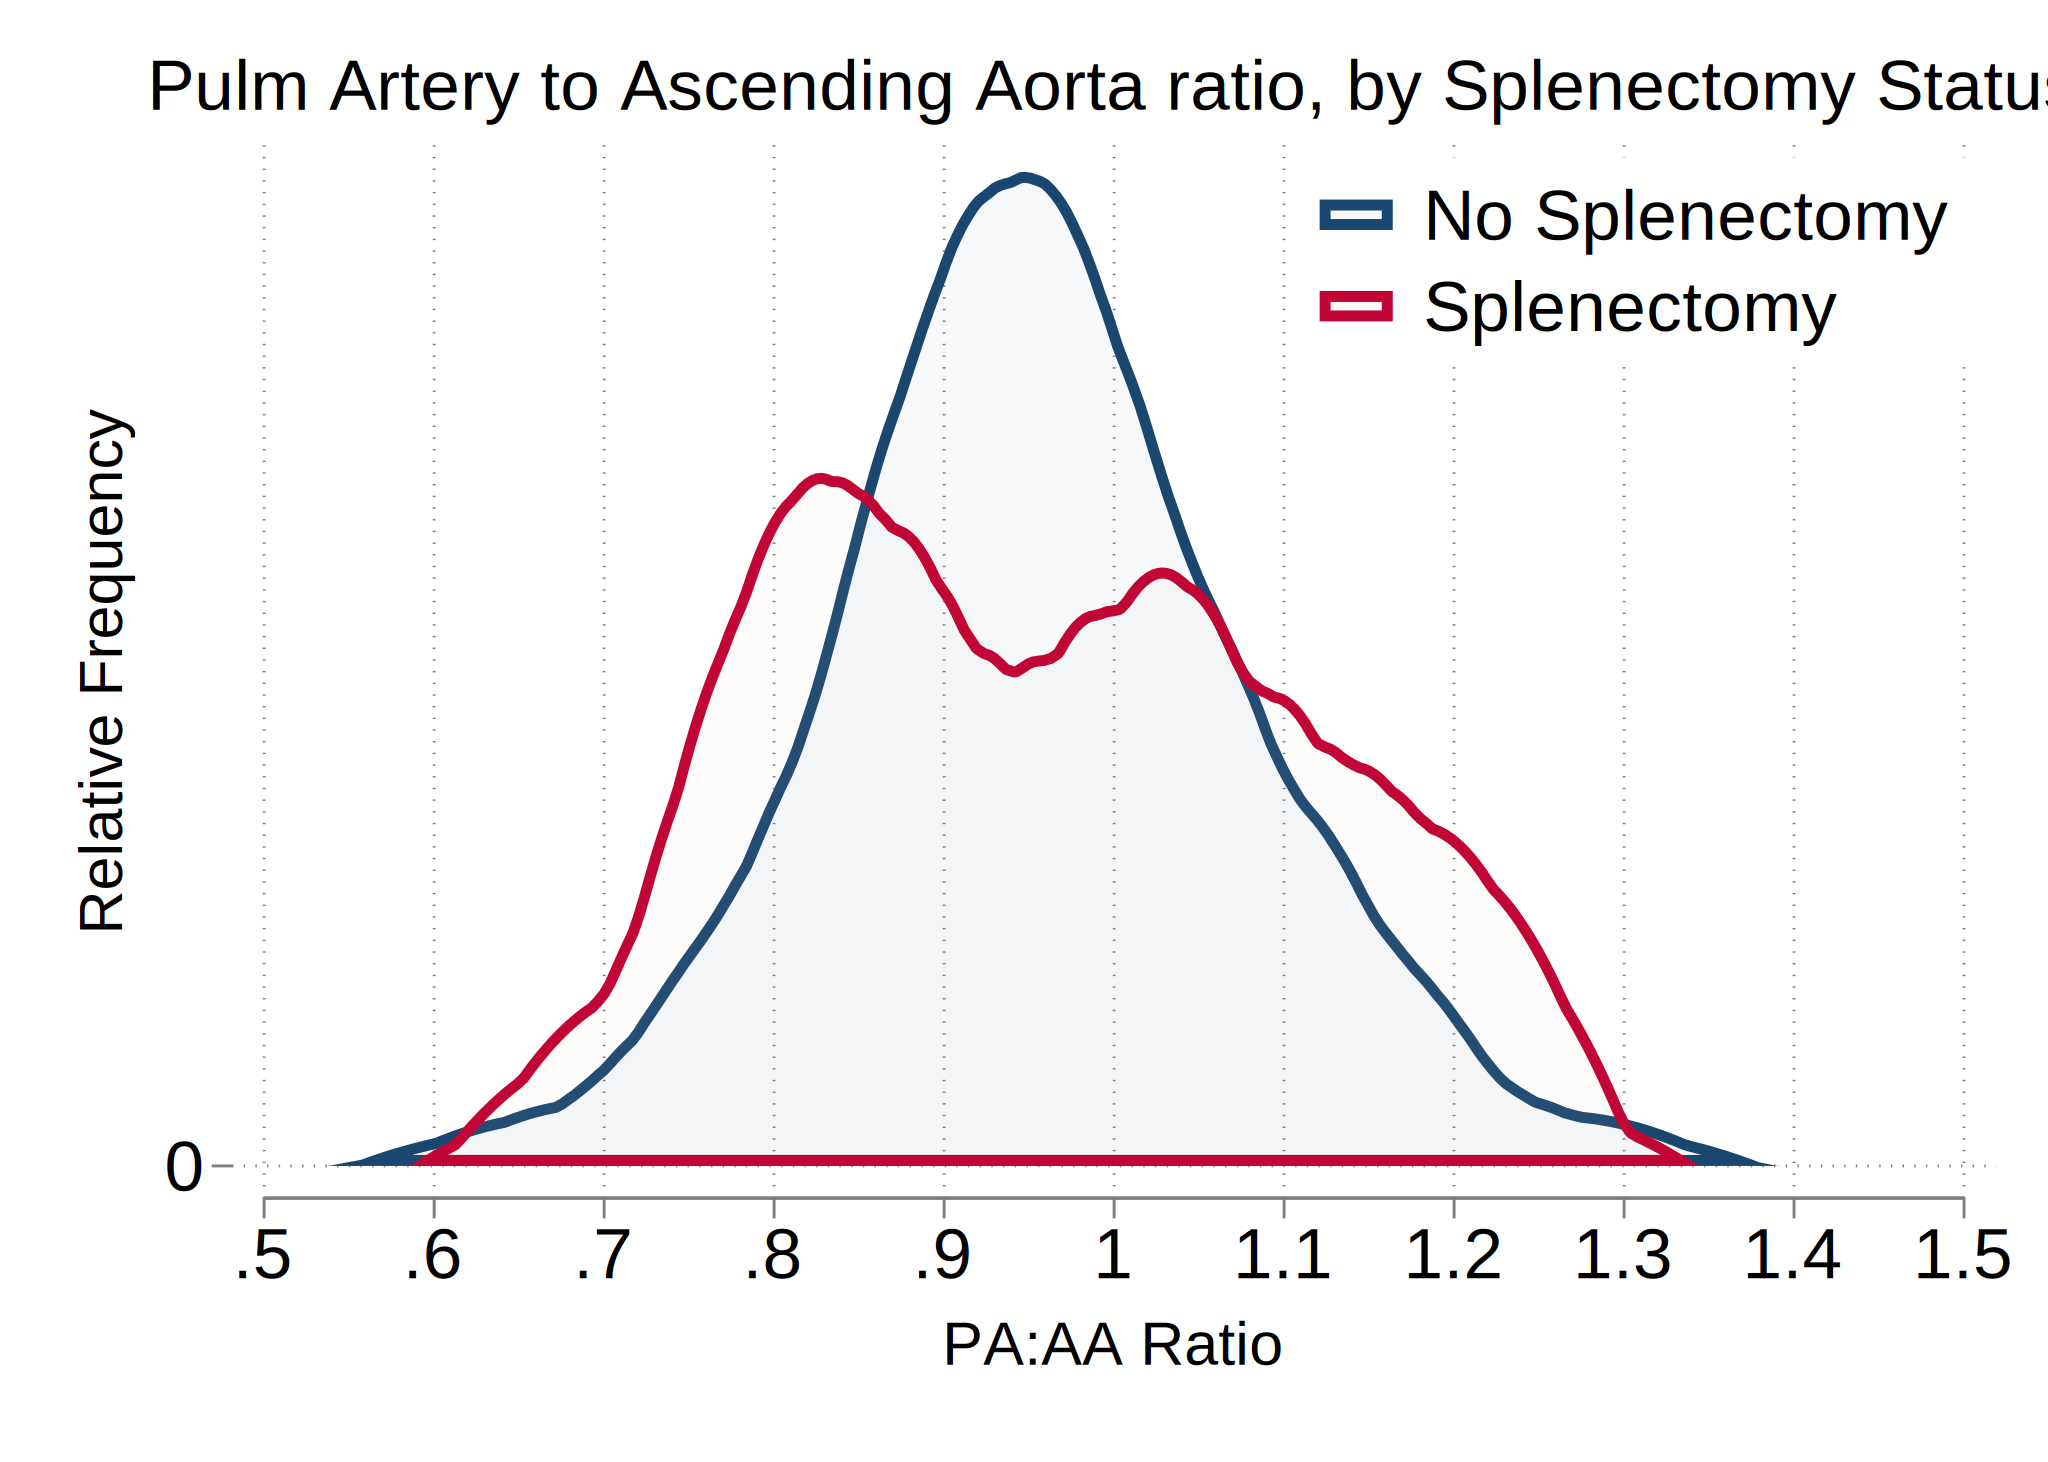

In [22]:
%%stata
//only ed
twoway kdensity pa_aa if splenectomy == 0 & ed_encounter, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(.05) range(0.5 1.5) || ///
kdensity pa_aa if splenectomy == 1 & ed_encounter, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(.05) range(0.5 1.5) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0.5(.1)1.5, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("PA:AA Ratio", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Pulm Artery to Ascending Aorta ratio, by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/ED-only PA to AA by Splenectomy Status.png", as(png) name("Graph") replace


. // variable hospitallosdays     "Hospital LOS"
. twoway kdensity hospitallosdays if splenectomy == 0, recast(area) fcolor(navy
> %05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(5) range(0 60) || ///
> kdensity hospitallosdays if splenectomy == 1, recast(area) fcolor(erose%05) l
> color(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(5) range(0 60) ||, ///
> legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(
> large)) ///
> xlabel(0(10)60, labsize(large)) ///
> ylabel(0, labsize(large)) ///
> xtitle("Hospital LOS", size(medlarge)) ///
> ytitle("Relative Frequency", size(medlarge)) ///
> title("Hospital LOS by Splenectomy Status", size(large)) ///
> xsize(7) ///
> ysize(5) ///
> scheme(white_tableau)

. graph export "Results and Figures/$S_DATE/Hospital LOS by Splenectomy Status.
> png", as(png) name("Graph") replace 
file Results and Figures/ 2 Feb 2025/Hospital LOS by Splenectomy Status.png wri
> tten in PNG format

. 


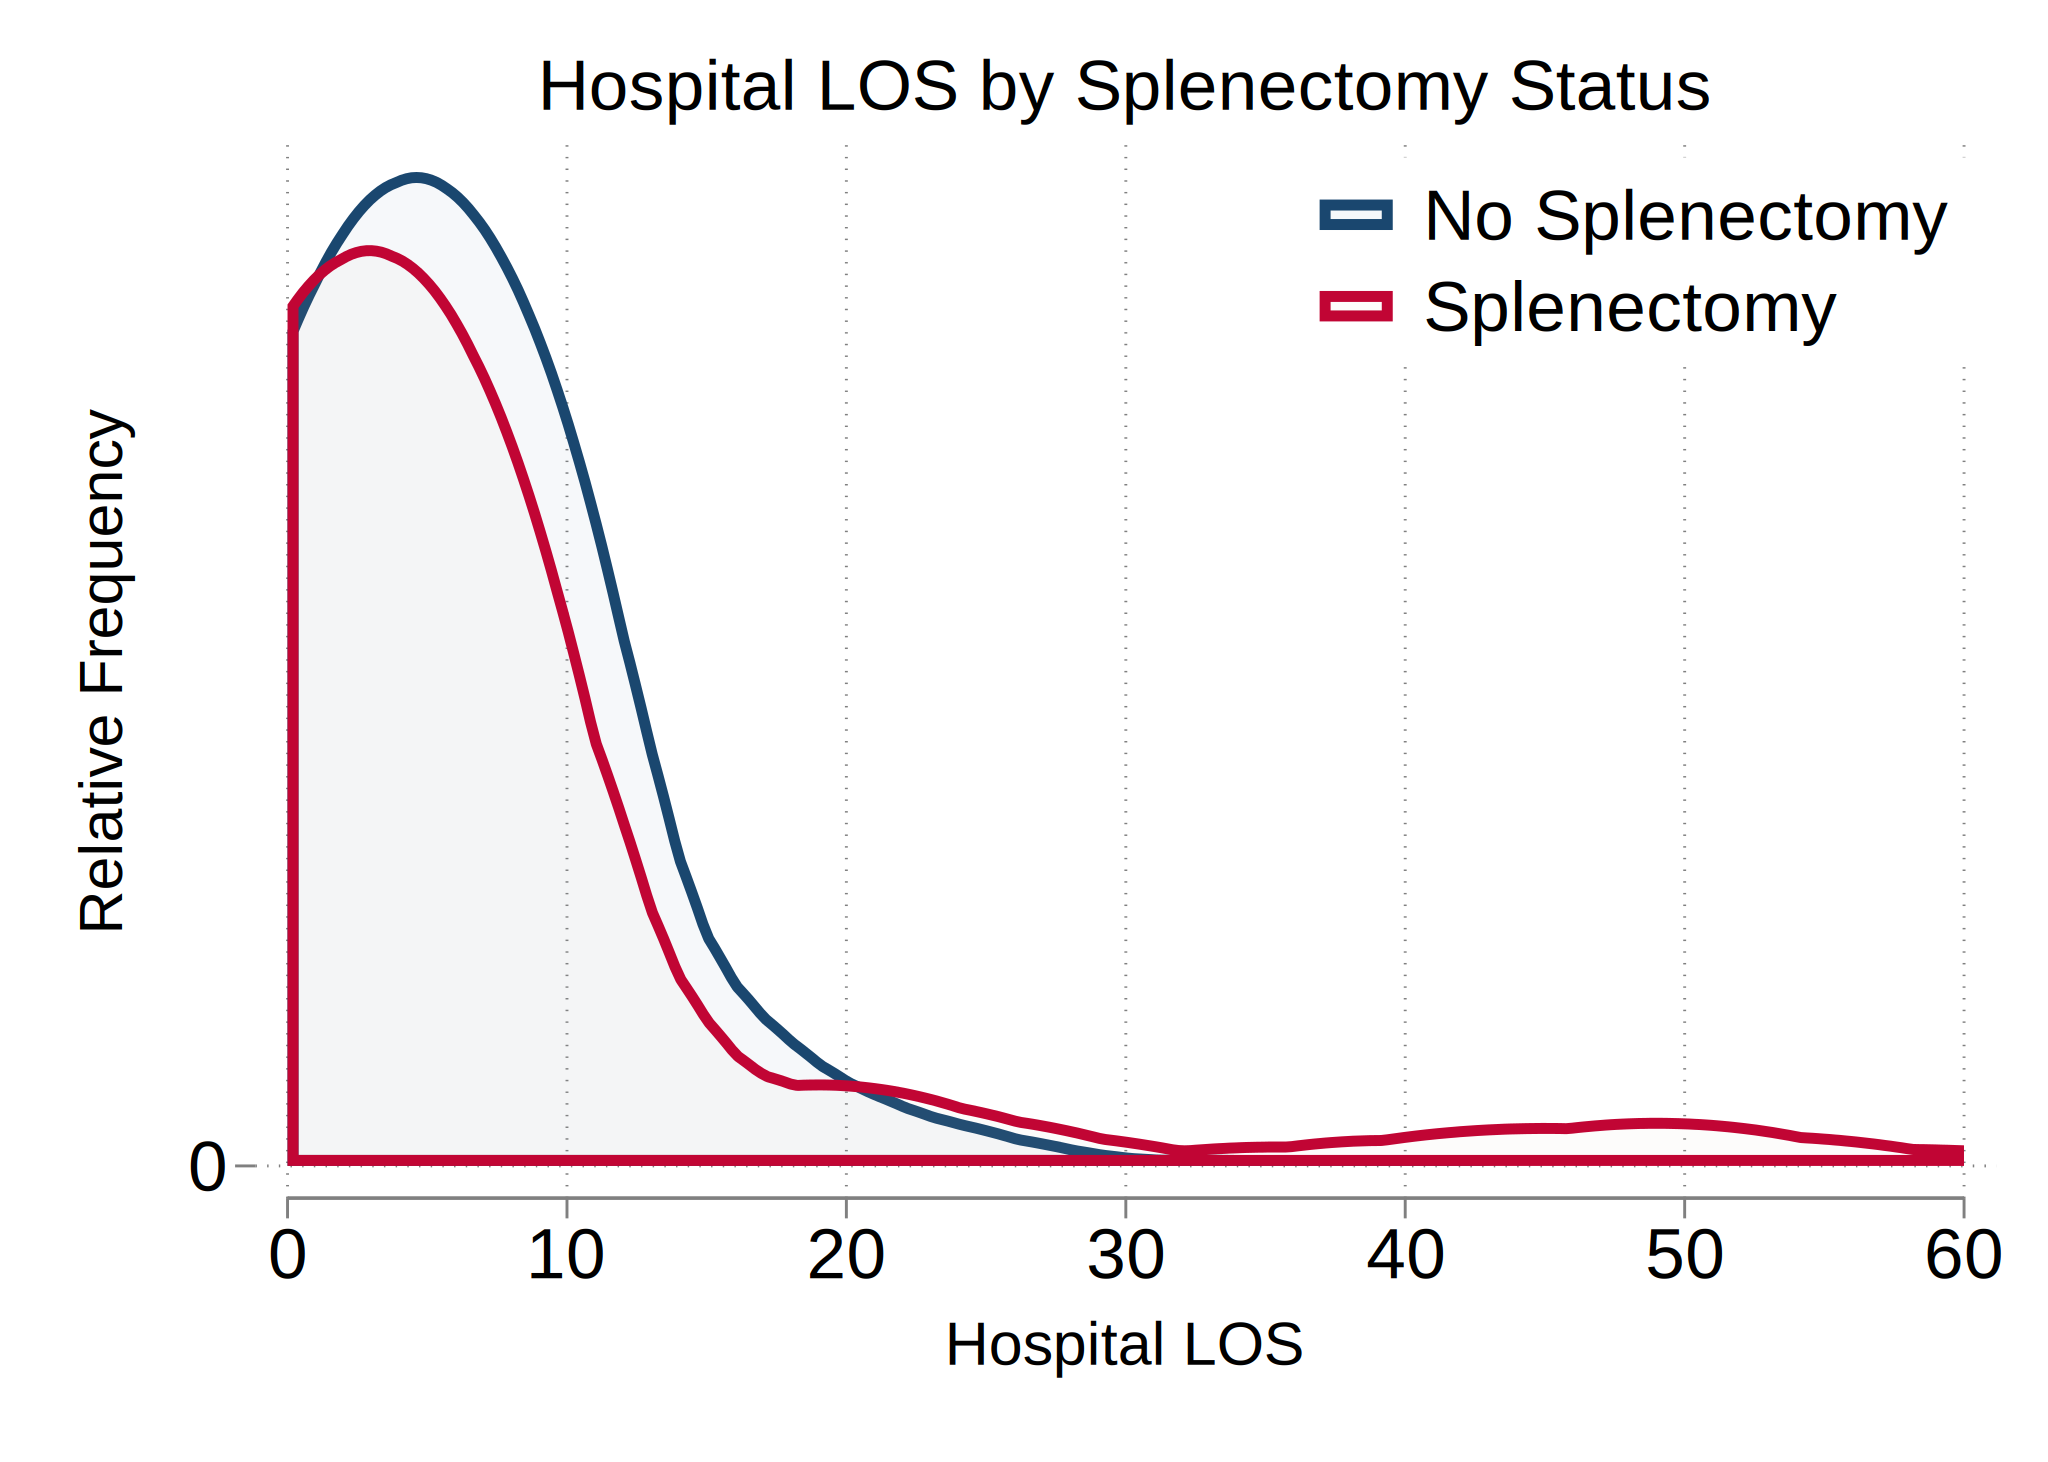

In [23]:
%%stata
// variable hospitallosdays	"Hospital LOS"
twoway kdensity hospitallosdays if splenectomy == 0, recast(area) fcolor(navy%05) lcolor(navy) lpattern(solid) lwidth(*2.5) bwidth(5) range(0 60) || ///
kdensity hospitallosdays if splenectomy == 1, recast(area) fcolor(erose%05) lcolor(cranberry) lpattern(solid)  lwidth(*2.5) bwidth(5) range(0 60) ||, ///
legend(pos(2) ring(0) order(1 "No Splenectomy" 2 "Splenectomy") rows(2) size(large)) ///
xlabel(0(10)60, labsize(large)) ///
ylabel(0, labsize(large)) ///
xtitle("Hospital LOS", size(medlarge)) ///
ytitle("Relative Frequency", size(medlarge)) ///
title("Hospital LOS by Splenectomy Status", size(large)) ///
xsize(7) ///
ysize(5) ///
scheme(white_tableau)
graph export "Results and Figures/$S_DATE/Hospital LOS by Splenectomy Status.png", as(png) name("Graph") replace 

## Main Analyses

Here are the main associations between splenectomy status and Central vs Peripheral and Qanadli score. 

In [24]:
%%stata
poisson qanadli splenectomy, irr 


note: noncount dependent variable encountered; if you are fitting an
      exponential-mean model, consider using robust standard errors.

Iteration 0:  Log likelihood = -79.633517  
Iteration 1:  Log likelihood = -79.633517  

Poisson regression                                      Number of obs =    151
                                                        LR chi2(1)    =   0.23
                                                        Prob > chi2   = 0.6280
Log likelihood = -79.633517                             Pseudo R2     = 0.0015

------------------------------------------------------------------------------
     qanadli |        IRR   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   .8448982   .2970628    -0.48   0.632     .4241558    1.682997
       _cons |    .268625    .051829    -6.81   0.000     .1840407    .3920839
-----------------------------------------------------------

I used a Poisson regression because Qanadli score is actually a proportion (of occluded segments). 

Thus, the interpretation is: patients with splenectomy have 0.84x [0.42-1.68] of non-splenectomy

In [25]:
%%stata
poisson qanadli splenectomy if ed_encounter, irr

note: noncount dependent variable encountered; if you are fitting an
      exponential-mean model, consider using robust standard errors.

Iteration 0:  Log likelihood =  -71.35674  
Iteration 1:  Log likelihood =  -71.35674  

Poisson regression                                      Number of obs =    130
                                                        LR chi2(1)    =   0.02
                                                        Prob > chi2   = 0.8987
Log likelihood = -71.35674                              Pseudo R2     = 0.0001

------------------------------------------------------------------------------
     qanadli |        IRR   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   1.051652   .4143305     0.13   0.898     .4858644    2.276297
       _cons |    .268625    .051829    -6.81   0.000     .1840407    .3920839
------------------------------------------------------------

no difference if restricted to only ED workups

In [26]:
%%stata
poisson qanadli splenectomy age male_sex bmi_pe, irr
estimates store qanadli
poisson qanadli splenectomy age male_sex bmi_pe if ed_encounter, irr


. poisson qanadli splenectomy age male_sex bmi_pe, irr
note: noncount dependent variable encountered; if you are fitting an
      exponential-mean model, consider using robust standard errors.

Iteration 0:  Log likelihood = -68.440556  
Iteration 1:  Log likelihood = -68.440556  

Poisson regression                                      Number of obs =    130
                                                        LR chi2(4)    =   0.63
                                                        Prob > chi2   = 0.9591
Log likelihood = -68.440556                             Pseudo R2     = 0.0046

------------------------------------------------------------------------------
     qanadli |        IRR   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   .8015604   .3590922    -0.49   0.621     .3331235    1.928712
         age |   1.004224   .0118818     0.36   0.722     .9812042    1.027784
    

no changes when correcting for other covariates, ED or not


. coefplot qanadli, eform ///
> drop(_cons) ///
> xscale(log range(0.25 4) extend) ///
> xline(1) ///
> xlabel(0.25 0.5 1 2 4, labsize(large)) ///
> xscale(extend) ///
> xtitle("Multiplicative Change in Qanadli Score" , size(large)) yscale(extend)
>  ///
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,
> "%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. graph export "Results and Figures/$S_DATE/Qanadli Poisson Regression.png", as
> (png) name("Graph") replace 
file Results and Figures/ 2 Feb 2025/Qanadli Poisson Regression.png written in 
> PNG format

. 


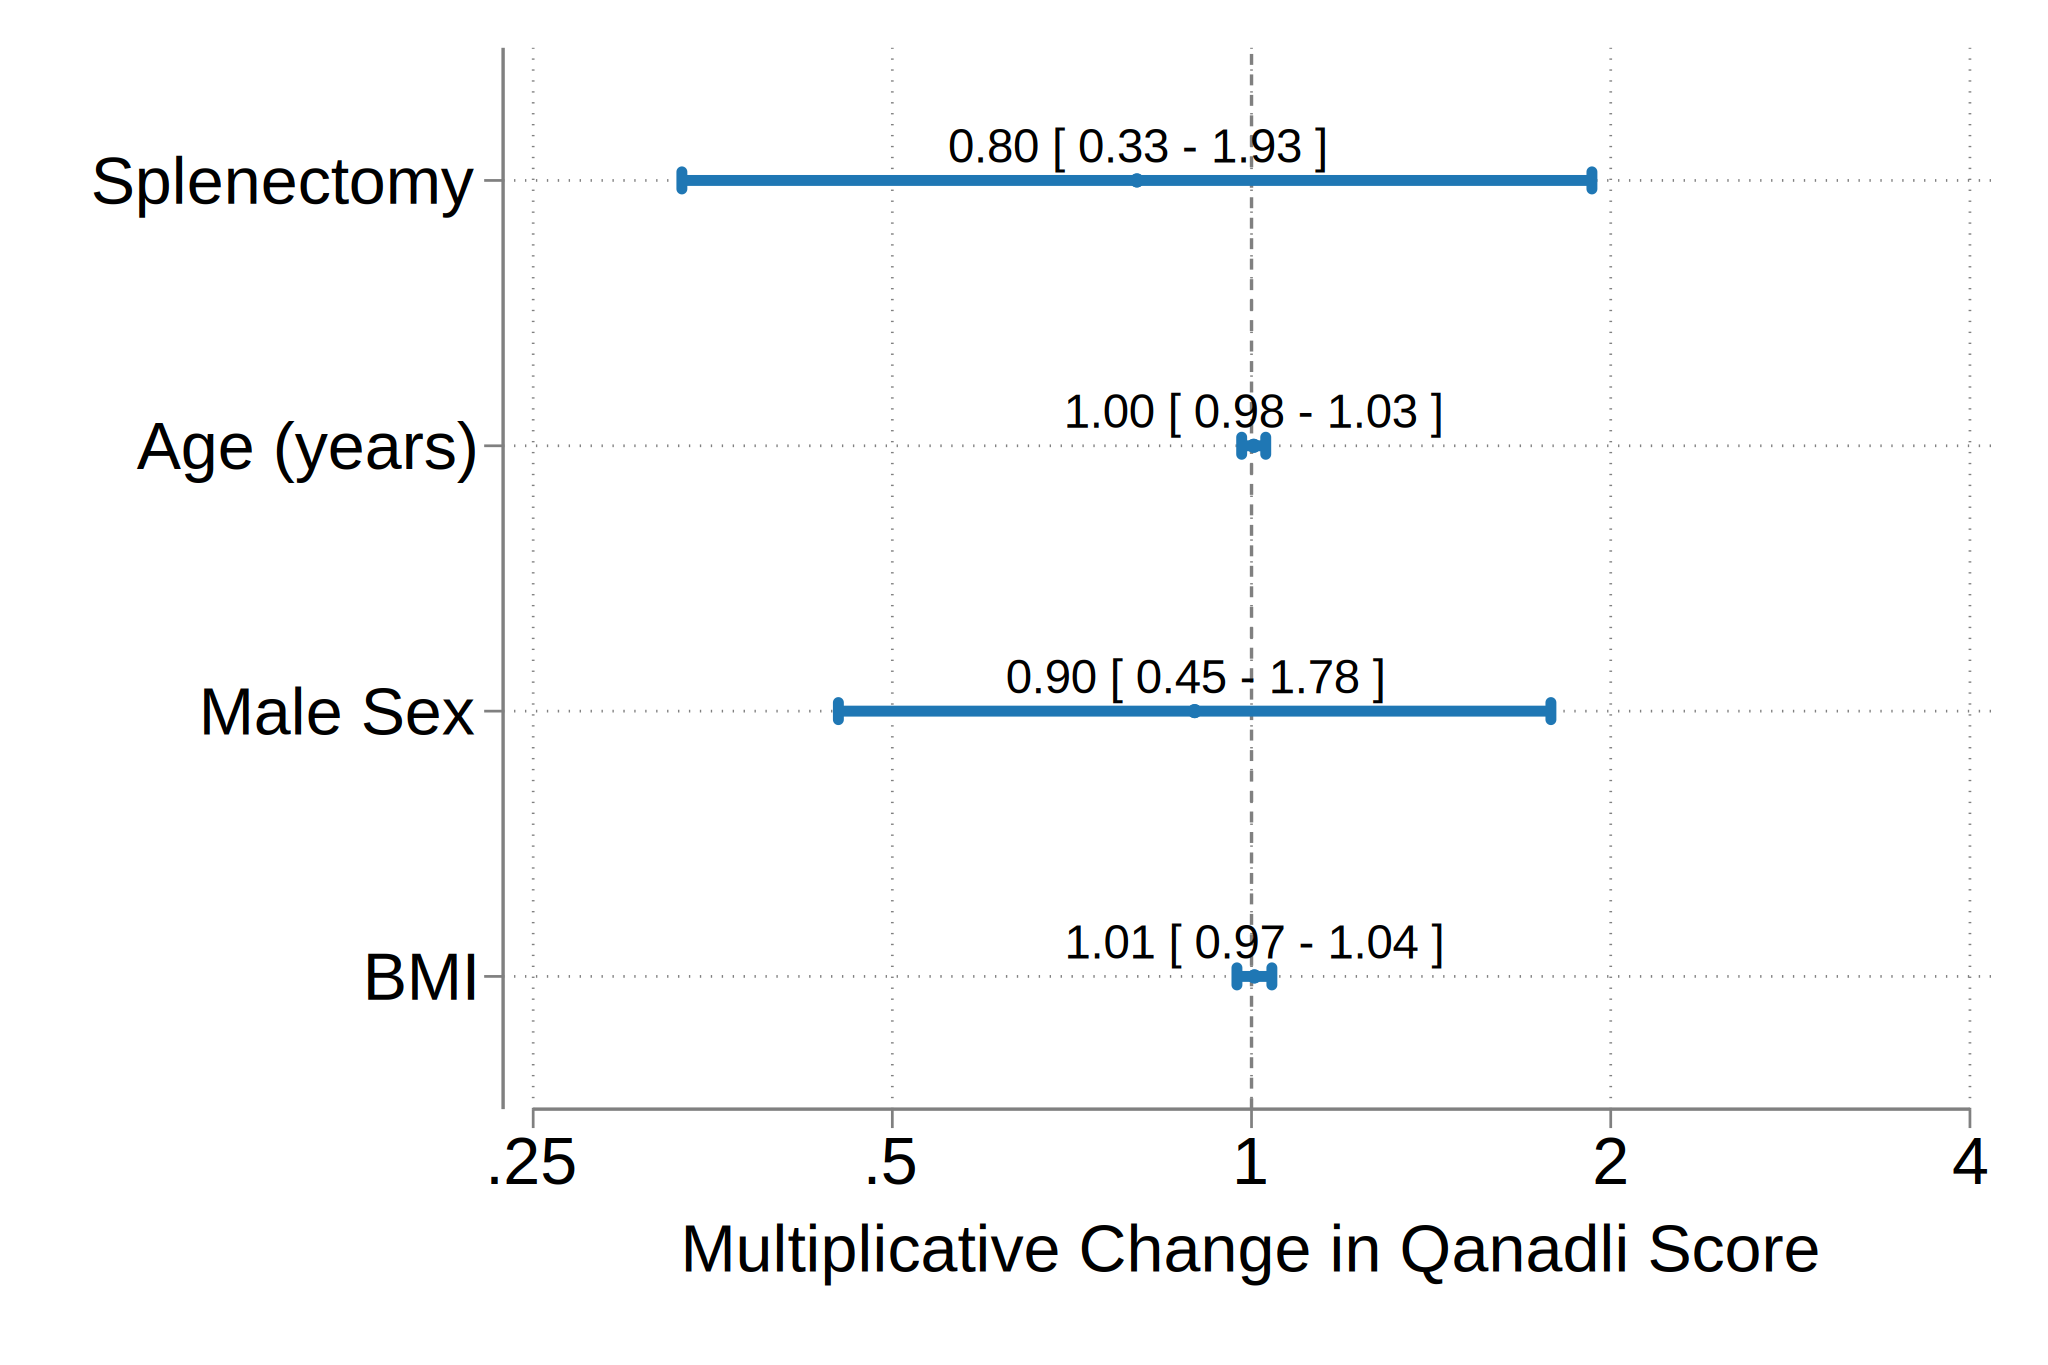

In [27]:
%%stata
coefplot qanadli, eform ///
drop(_cons) ///
xscale(log range(0.25 4) extend) ///
xline(1) ///
xlabel(0.25 0.5 1 2 4, labsize(large)) ///
xscale(extend) ///
xtitle("Multiplicative Change in Qanadli Score" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 
graph export "Results and Figures/$S_DATE/Qanadli Poisson Regression.png", as(png) name("Graph") replace 

For the Peripheral vs Central classification, we can present this as an Odds Ratio or a Relative Risk - either way works

In [28]:
%%stata
cs peripheral splenectomy 


                 |      Splenectomy       |
                 |   Exposed   Unexposed  |      Total
-----------------+------------------------+-----------
           Cases |        28          37  |         65
        Noncases |        23          63  |         86
-----------------+------------------------+-----------
           Total |        51         100  |        151
                 |                        |
            Risk |  .5490196         .37  |   .4304636
                 |                        |
                 |      Point estimate    |    [95% conf. interval]
                 |------------------------+------------------------
 Risk difference |         .1790196       |    .0128747    .3451645 
      Risk ratio |         1.483837       |    1.038593    2.119957 
 Attr. frac. ex. |         .3260714       |    .0371587    .5282922 
 Attr. frac. pop |         .1404615       |
                 +-------------------------------------------------
                           

those with splenectomy are 17.9% [1.3-34.5%] more likely to have peripheral PE

In [29]:
%%stata
cs peripheral splenectomy if ed_encounter


                 |      Splenectomy       |
                 |   Exposed   Unexposed  |      Total
-----------------+------------------------+-----------
           Cases |        14          37  |         51
        Noncases |        16          63  |         79
-----------------+------------------------+-----------
           Total |        30         100  |        130
                 |                        |
            Risk |  .4666667         .37  |   .3923077
                 |                        |
                 |      Point estimate    |    [95% conf. interval]
                 |------------------------+------------------------
 Risk difference |         .0966667       |   -.1053836     .298717 
      Risk ratio |         1.261261       |    .7960839    1.998257 
 Attr. frac. ex. |         .2071429       |    -.256149    .4995638 
 Attr. frac. pop |         .0568627       |
                 +-------------------------------------------------
                           

no longer significant, directionally similar.

Same results, presented slightly differently below

In [30]:
%%stata
logistic peripheral splenectomy
logistic peripheral splenectomy age male_sex bmi_pe
estimates store peripheral



. logistic peripheral splenectomy

Logistic regression                                     Number of obs =    151
                                                        LR chi2(1)    =   4.40
                                                        Prob > chi2   = 0.0360
Log likelihood = -101.00058                             Pseudo R2     = 0.0213

------------------------------------------------------------------------------
  peripheral | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   2.072855    .724292     2.09   0.037     1.045067    4.111438
       _cons |   .5873016   .1216438    -2.57   0.010      .391343    .8813833
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.

. logistic peripheral splenectomy age male_sex bmi_pe

Logistic regression                                     Number of obs =    130
 


. coefplot peripheral, eform ///
> drop(_cons) ///
> xline(1) ///
> xlabel(0.25 0.5 1 2 4 8, labsize(large)) ///
> xscale(log range(0.25 4 8) extend) ///
> xtitle("Odds ratio of Peripheral PE" , size(large)) yscale(extend) ///
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,
> "%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. graph export "Results and Figures/$S_DATE/Peripheral Logistic Regression.png"
> , as(png) name("Graph") replace
file Results and Figures/ 2 Feb 2025/Peripheral Logistic Regression.png written
>  in PNG format

. 


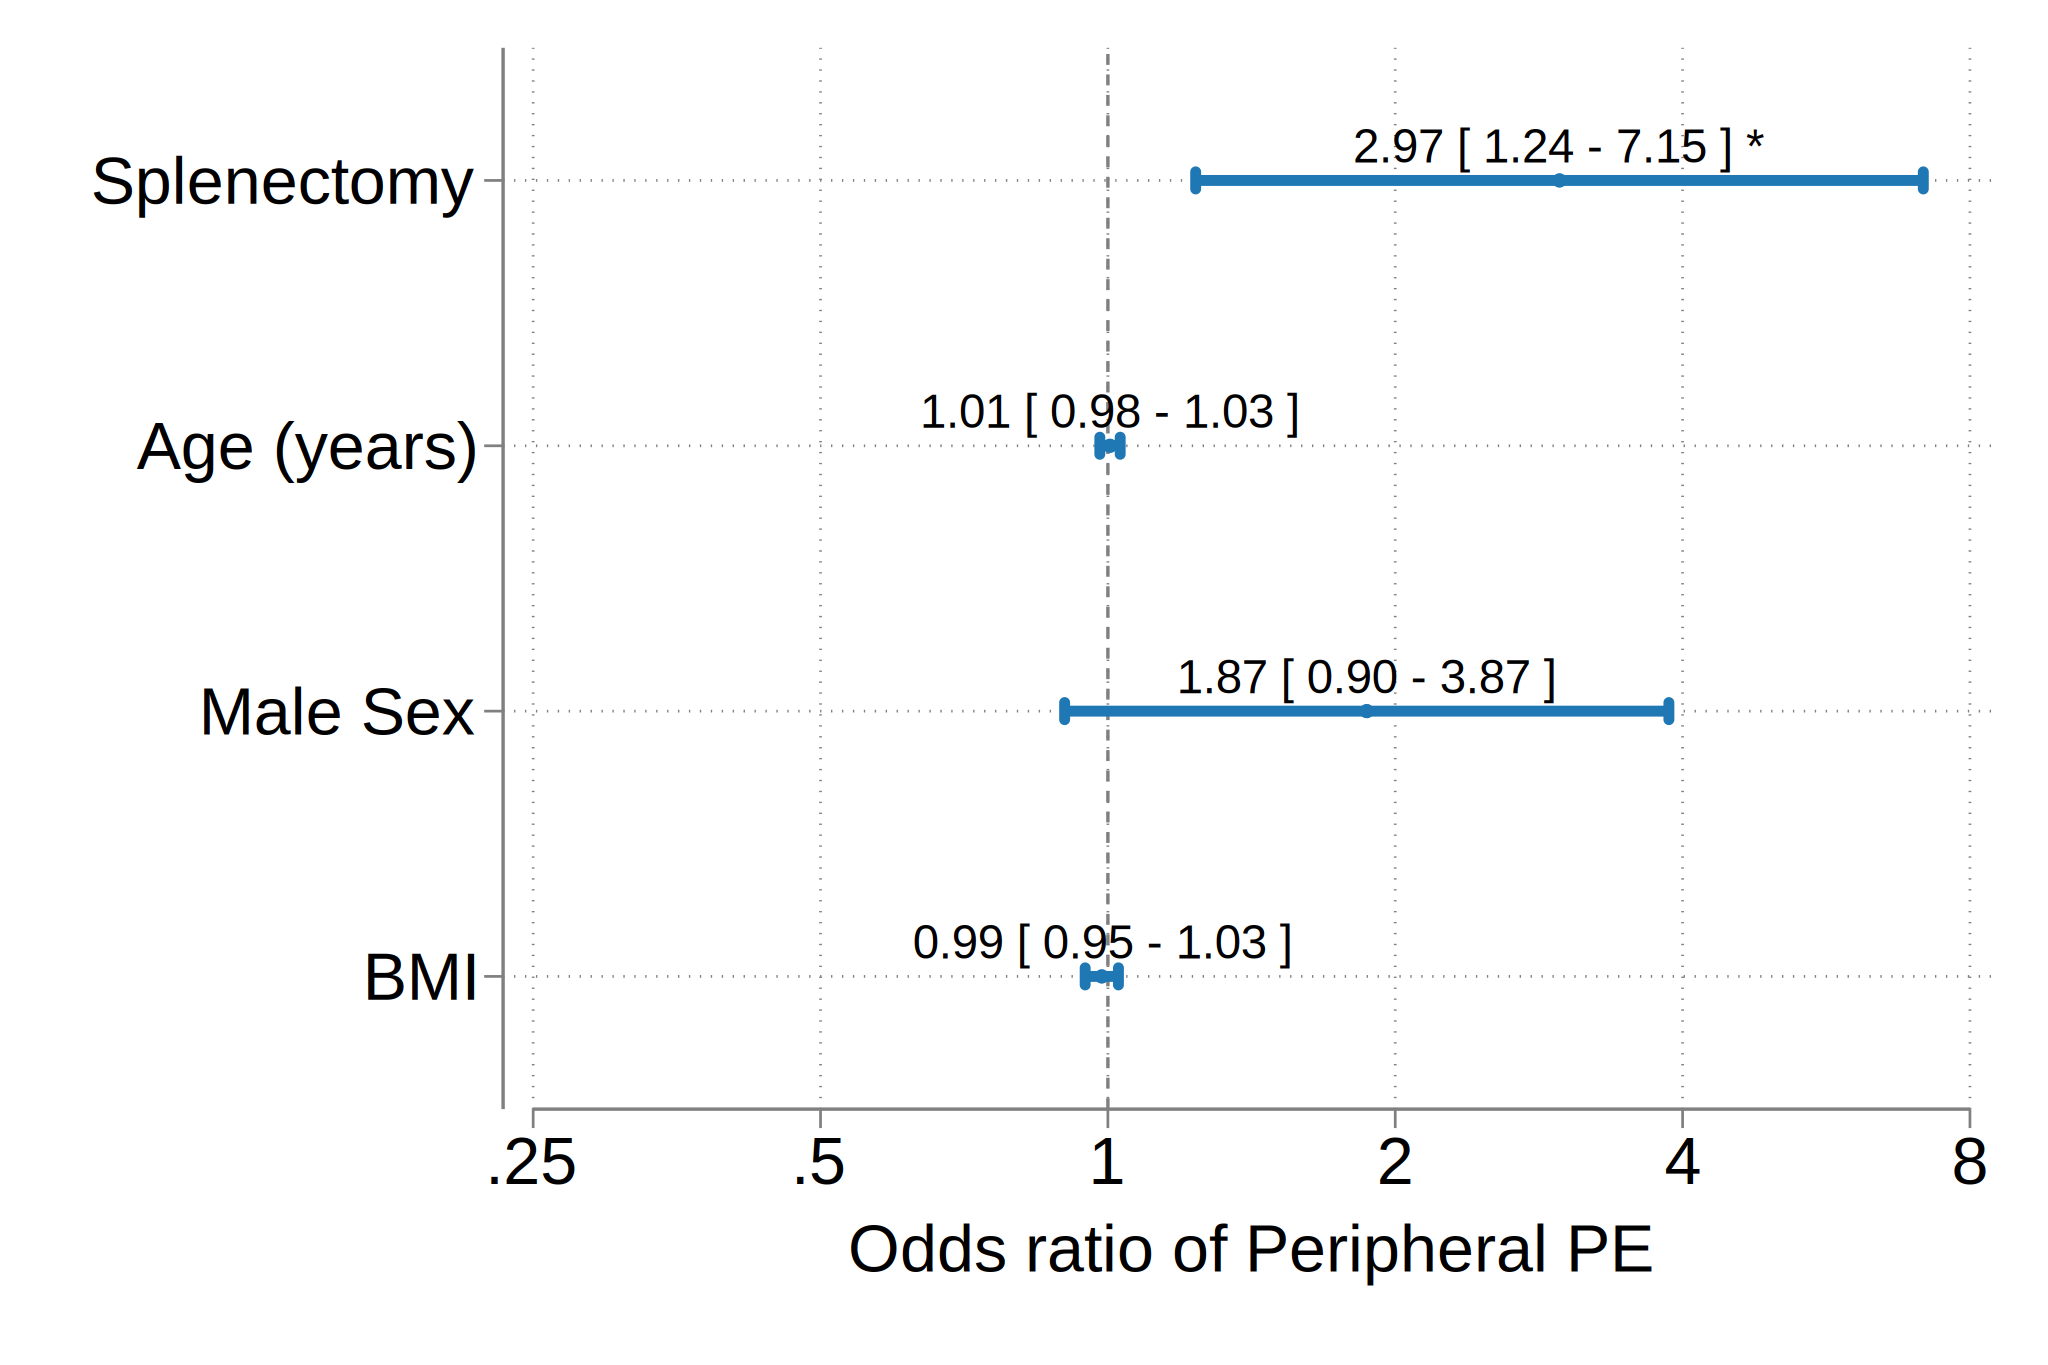

In [31]:
%%stata
coefplot peripheral, eform ///
drop(_cons) ///
xline(1) ///
xlabel(0.25 0.5 1 2 4 8, labsize(large)) ///
xscale(log range(0.25 4 8) extend) ///
xtitle("Odds ratio of Peripheral PE" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 
graph export "Results and Figures/$S_DATE/Peripheral Logistic Regression.png", as(png) name("Graph") replace


and for ED encounters only

In [32]:
%%stata
logistic peripheral splenectomy if ed_encounter
logistic peripheral splenectomy age male_sex bmi_pe if ed_encounter
estimates store peripheral_ed


. logistic peripheral splenectomy if ed_encounter

Logistic regression                                     Number of obs =    130
                                                        LR chi2(1)    =   0.89
                                                        Prob > chi2   = 0.3445
Log likelihood = -86.623267                             Pseudo R2     = 0.0051

------------------------------------------------------------------------------
  peripheral | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |   1.489865    .626503     0.95   0.343     .6534437    3.396922
       _cons |   .5873016   .1216438    -2.57   0.010      .391343    .8813833
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.

. logistic peripheral splenectomy age male_sex bmi_pe if ed_encounter

Logistic regression                             


. coefplot peripheral_ed, eform ///
> drop(_cons) ///
> xline(1) ///
> xlabel(0.25 0.5 1 2 4 8, labsize(large)) ///
> xscale(log range(0.25 4 8) extend) ///
> xtitle("Odds ratio of Peripheral PE, ED Only" , size(large)) yscale(extend) /
> //
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,
> "%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. graph export "Results and Figures/$S_DATE/Peripheral Logistic Regression.png"
> , as(png) name("Graph") replace
file Results and Figures/ 2 Feb 2025/Peripheral Logistic Regression.png written
>  in PNG format

. 


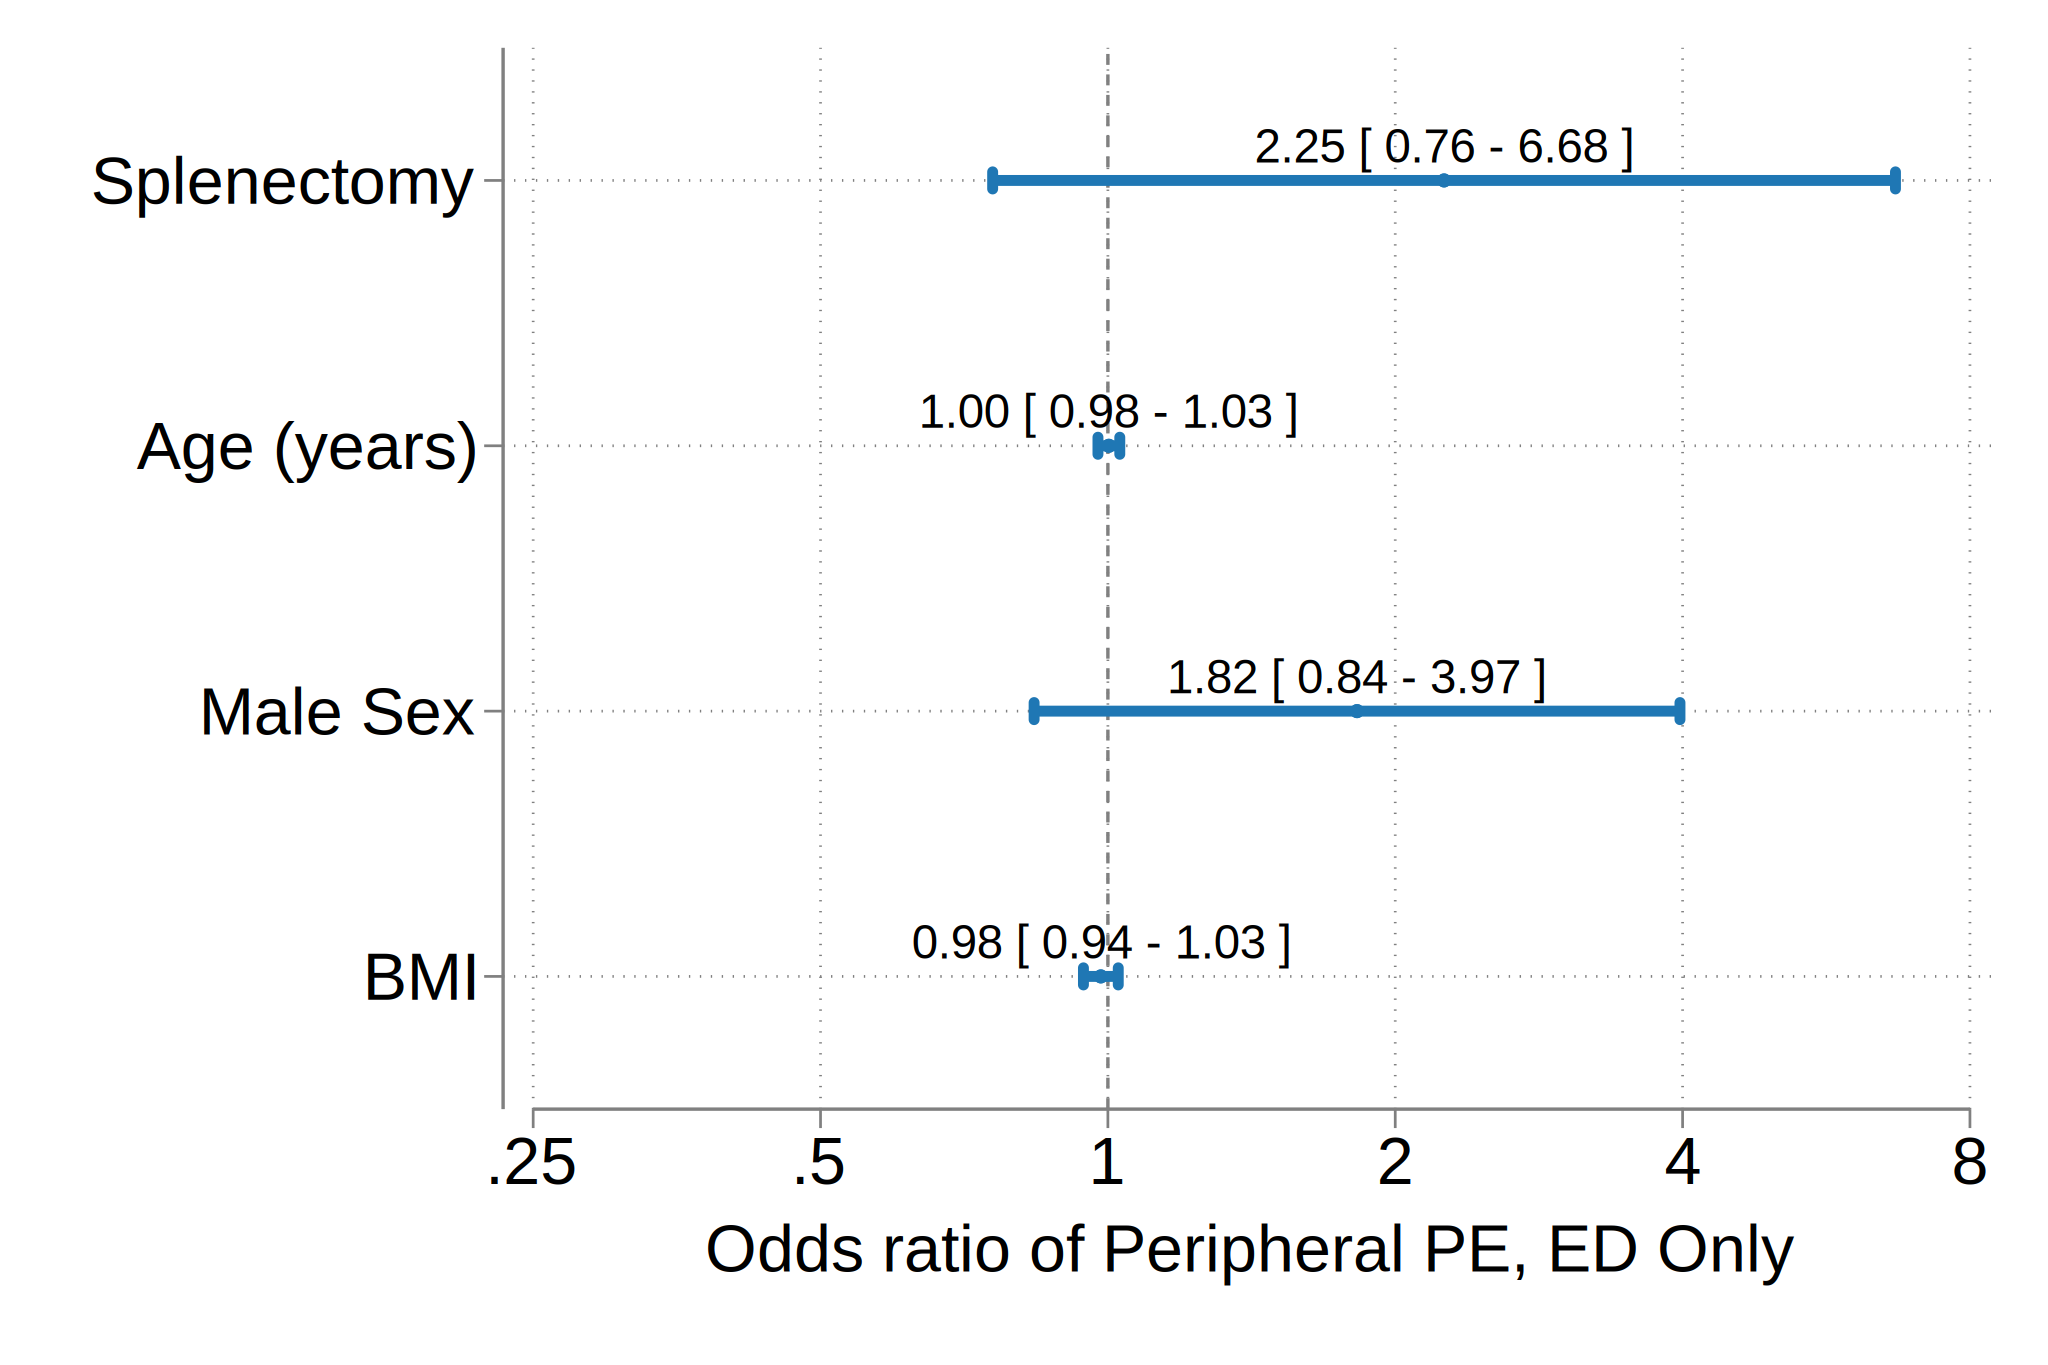

In [33]:
%%stata
coefplot peripheral_ed, eform ///
drop(_cons) ///
xline(1) ///
xlabel(0.25 0.5 1 2 4 8, labsize(large)) ///
xscale(log range(0.25 4 8) extend) ///
xtitle("Odds ratio of Peripheral PE, ED Only" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 
graph export "Results and Figures/$S_DATE/Peripheral Logistic Regression.png", as(png) name("Graph") replace


Lastly - the PA size metrics. 

They have relatively normal distributions - so just modeled with plain old linear regression

In [34]:
%%stata
regress pa_d splenectomy age male_sex bmi_pe
estimates store regress_pa_d


. regress pa_d splenectomy age male_sex bmi_pe

      Source |       SS           df       MS      Number of obs   =       130
-------------+----------------------------------   F(4, 125)       =      1.48
       Model |  110.531078         4  27.6327695   Prob > F        =    0.2115
    Residual |  2330.17885       125  18.6414308   R-squared       =    0.0453
-------------+----------------------------------   Adj R-squared   =    0.0147
       Total |  2440.70992       129   18.920232   Root MSE        =    4.3176

------------------------------------------------------------------------------
        pa_d | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |  -.0559407    .916236    -0.06   0.951    -1.869285    1.757404
         age |   .0442247   .0255317     1.73   0.086    -.0063057    .0947552
    male_sex |   .6373826   .7630991     0.84   0.405    -.8728851     2.14765
  

In [35]:
%%stata
regress pa_d splenectomy age male_sex bmi_pe if ed_encounter



      Source |       SS           df       MS      Number of obs   =       116
-------------+----------------------------------   F(4, 111)       =      1.93
       Model |  137.785322         4  34.4463304   Prob > F        =    0.1099
    Residual |  1978.22606       111  17.8218564   R-squared       =    0.0651
-------------+----------------------------------   Adj R-squared   =    0.0314
       Total |  2116.01138       115   18.400099   Root MSE        =    4.2216

------------------------------------------------------------------------------
        pa_d | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |    .649488   1.138945     0.57   0.570    -1.607407    2.906383
         age |   .0629554   .0270805     2.32   0.022     .0092935    .1166173
    male_sex |   .3149753   .8016647     0.39   0.695    -1.273577    1.903527
      bmi_pe |   .0833138   .0398653     2.09   0.


. coefplot regress_pa_d, ///
> drop(_cons) ///
> xline(0) ///
> xlabel(-2(1)2, labsize(large)) ///
> xscale(range(-2.5 2.5) extend) ///
> xtitle("Change in PA diameter (mm)" , size(large)) yscale(extend) ///
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,
> "%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. graph export "Results and Figures/$S_DATE/PA_d linear Regression.png", as(png
> ) name("Graph") replace
file Results and Figures/ 2 Feb 2025/PA_d linear Regression.png written in PNG 
> format

. 


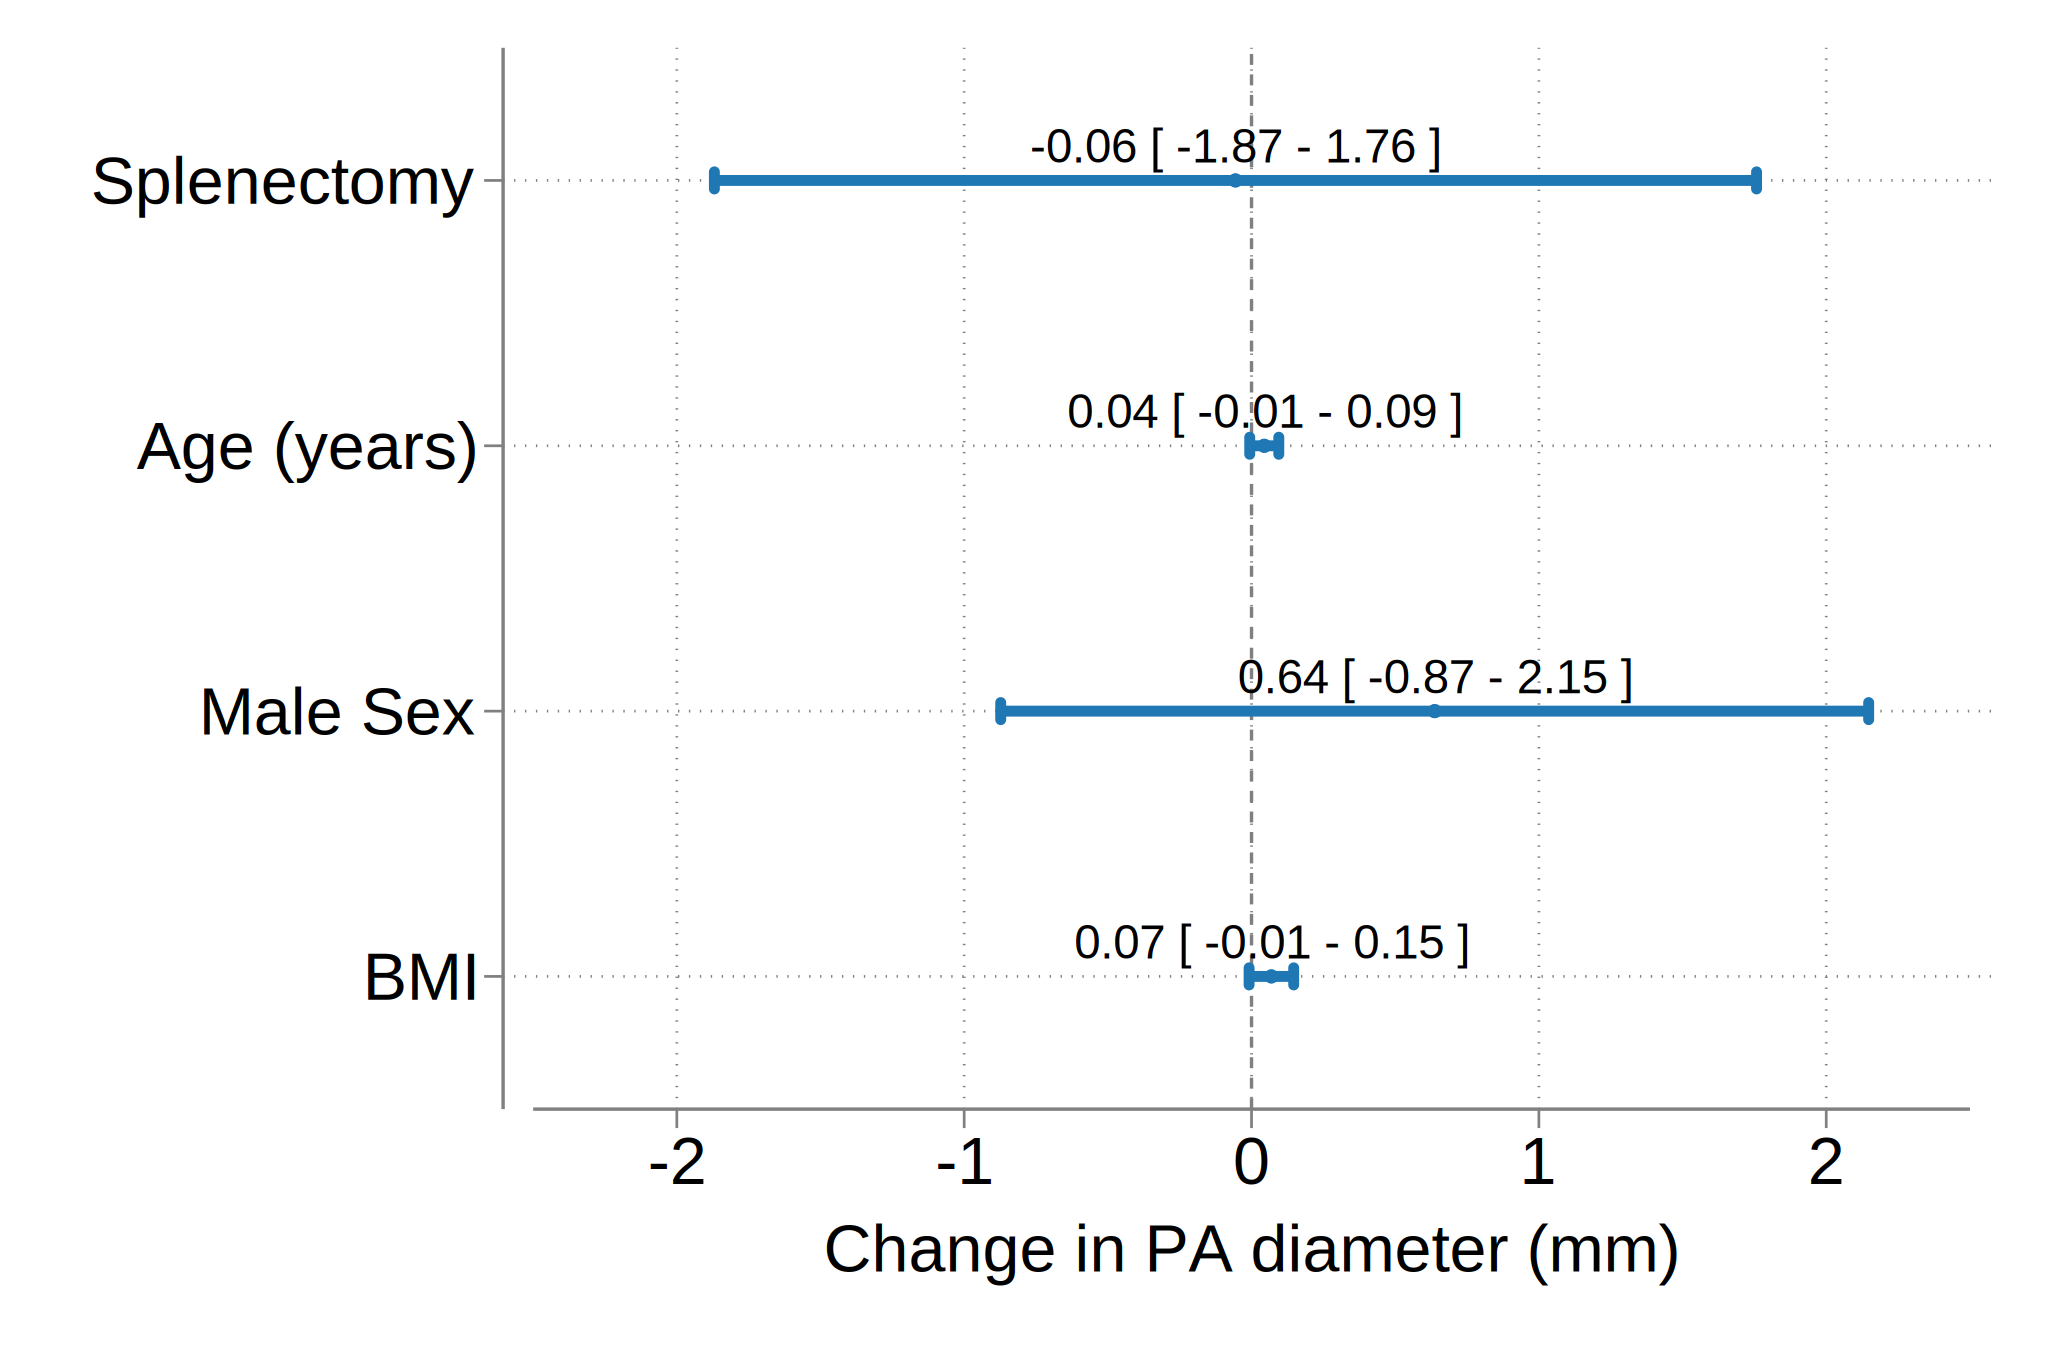

In [36]:
%%stata
coefplot regress_pa_d, ///
drop(_cons) ///
xline(0) ///
xlabel(-2(1)2, labsize(large)) ///
xscale(range(-2.5 2.5) extend) ///
xtitle("Change in PA diameter (mm)" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.2f") + " [ " + string(@ll,"%9.2f") + " - " + string(@ul,"%9.2f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 
graph export "Results and Figures/$S_DATE/PA_d linear Regression.png", as(png) name("Graph") replace

In [37]:
%%stata
regress pa_aa splenectomy age male_sex bmi_pe
estimates store regress_pa_aa


. regress pa_aa splenectomy age male_sex bmi_pe

      Source |       SS           df       MS      Number of obs   =       130
-------------+----------------------------------   F(4, 125)       =      7.26
       Model |  .439931535         4  .109982884   Prob > F        =    0.0000
    Residual |  1.89353397       125  .015148272   R-squared       =    0.1885
-------------+----------------------------------   Adj R-squared   =    0.1626
       Total |  2.33346551       129   .01808888   Root MSE        =    .12308

------------------------------------------------------------------------------
       pa_aa | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |  -.0263153   .0261186    -1.01   0.316    -.0780071    .0253766
         age |  -.0036311   .0007278    -4.99   0.000    -.0050716   -.0021907
    male_sex |  -.0437365   .0217532    -2.01   0.047    -.0867887   -.0006842
 

In [38]:
%%stata
regress pa_aa splenectomy age male_sex bmi_pe if ed_encounter


      Source |       SS           df       MS      Number of obs   =       116
-------------+----------------------------------   F(4, 111)       =      4.86
       Model |  .248744766         4  .062186191   Prob > F        =    0.0012
    Residual |  1.42031612       111  .012795641   R-squared       =    0.1490
-------------+----------------------------------   Adj R-squared   =    0.1184
       Total |  1.66906088       115  .014513573   Root MSE        =    .11312

------------------------------------------------------------------------------
       pa_aa | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 splenectomy |  -.0135835   .0305181    -0.45   0.657    -.0740571    .0468901
         age |  -.0024785   .0007256    -3.42   0.001    -.0039164   -.0010407
    male_sex |   -.058709   .0214806    -2.73   0.007    -.1012744   -.0161437
      bmi_pe |  -.0006289   .0010682    -0.59   0.


. coefplot regress_pa_aa, ///
> drop(_cons) ///
> xline(0) ///
> xlabel(-.1(0.05).1, labsize(large)) ///
> xscale(range(-.12 .12) extend) ///
> xtitle("Change in PA:AA ratio (mm)" , size(large)) yscale(extend) ///
> ylabel(, labsize(large)) ///
> ciopts(recast(rcap) ///
> lwidth(thick)) ///
> mlabel(string(@b,"%9.3f") + " [ " + string(@ll,"%9.3f") + " - " + string(@ul,
> "%9.3f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.
> 05, "*", "")))) ///
> mlabsize(medsmall) ///
> mlabposition(12) ///
> mlabgap(*1) ///
> scheme(white_tableau) 

. graph export "Results and Figures/$S_DATE/PA_AA linear Regression.png", as(pn
> g) name("Graph") replace
file Results and Figures/ 2 Feb 2025/PA_AA linear Regression.png written in PNG
>  format

. 


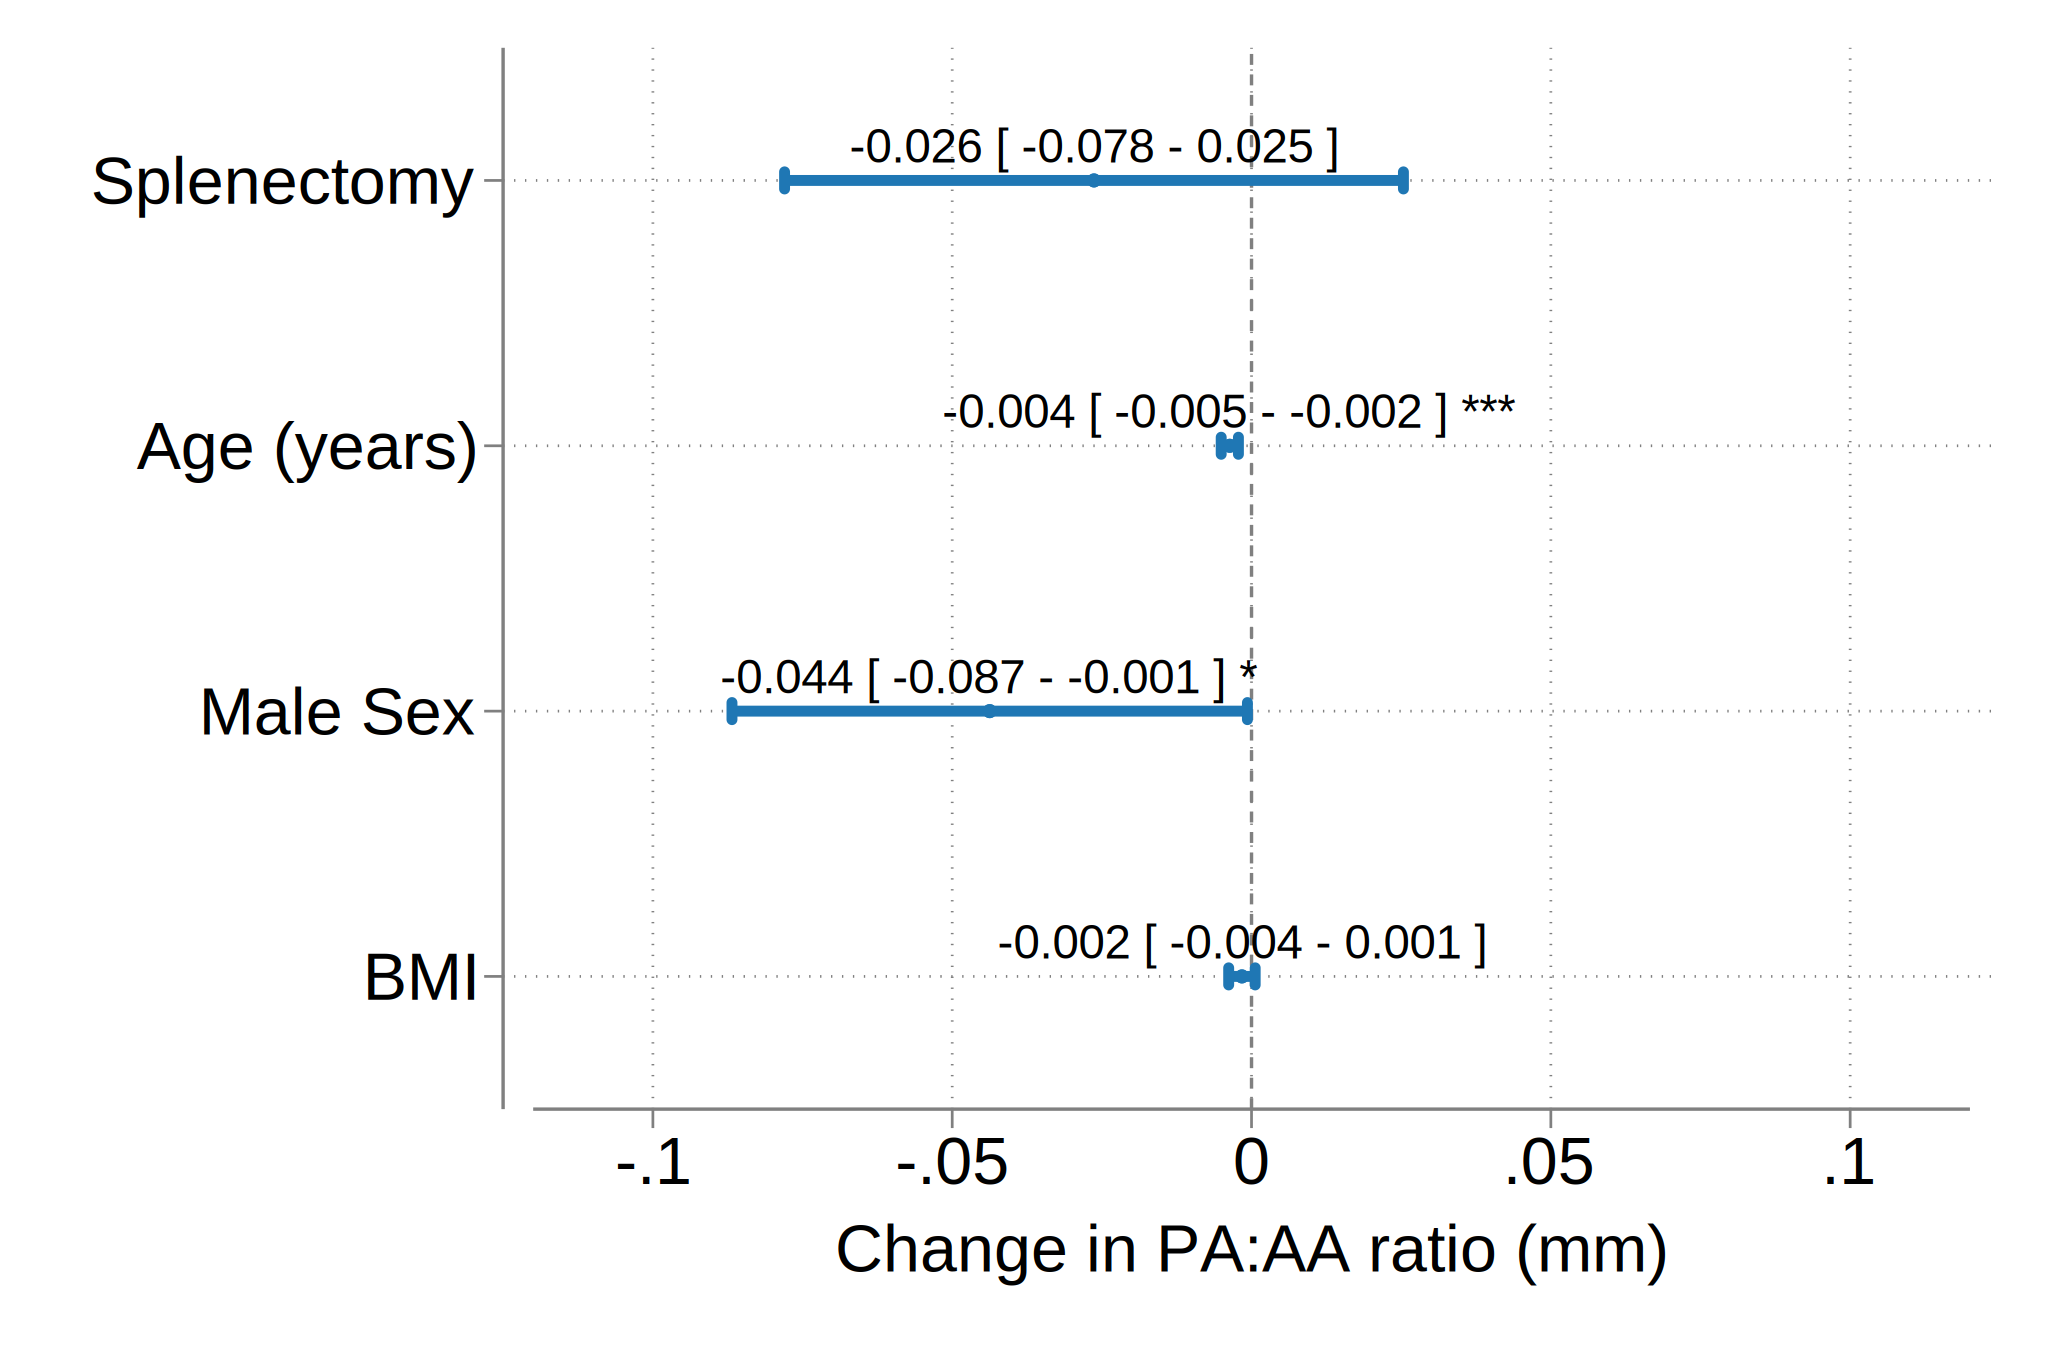

In [39]:
%%stata
coefplot regress_pa_aa, ///
drop(_cons) ///
xline(0) ///
xlabel(-.1(0.05).1, labsize(large)) ///
xscale(range(-.12 .12) extend) ///
xtitle("Change in PA:AA ratio (mm)" , size(large)) yscale(extend) ///
ylabel(, labsize(large)) ///
ciopts(recast(rcap) ///
lwidth(thick)) ///
mlabel(string(@b,"%9.3f") + " [ " + string(@ll,"%9.3f") + " - " + string(@ul,"%9.3f") + " ] " + cond(@pval<.001, "***", cond(@pval<.01, "**", cond(@pval<.05, "*", "")))) ///
mlabsize(medsmall) ///
mlabposition(12) ///
mlabgap(*1) ///
scheme(white_tableau) 
graph export "Results and Figures/$S_DATE/PA_AA linear Regression.png", as(png) name("Graph") replace

not much for interesting relationships there